In [4]:
import pandas as pd 
import matplotlib as plt
import os
import psycopg2

# Identifying the top 10 handsets used by the customers

In [5]:
# Load dataset
df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\3804657477.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
df.count()

Bearer Id                                   149010
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
Dur. (ms)                                   150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

In [8]:
handset_counts = df['Handset Type'].value_counts()

In [9]:
top_10_handsets = handset_counts.head(10)

In [10]:
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


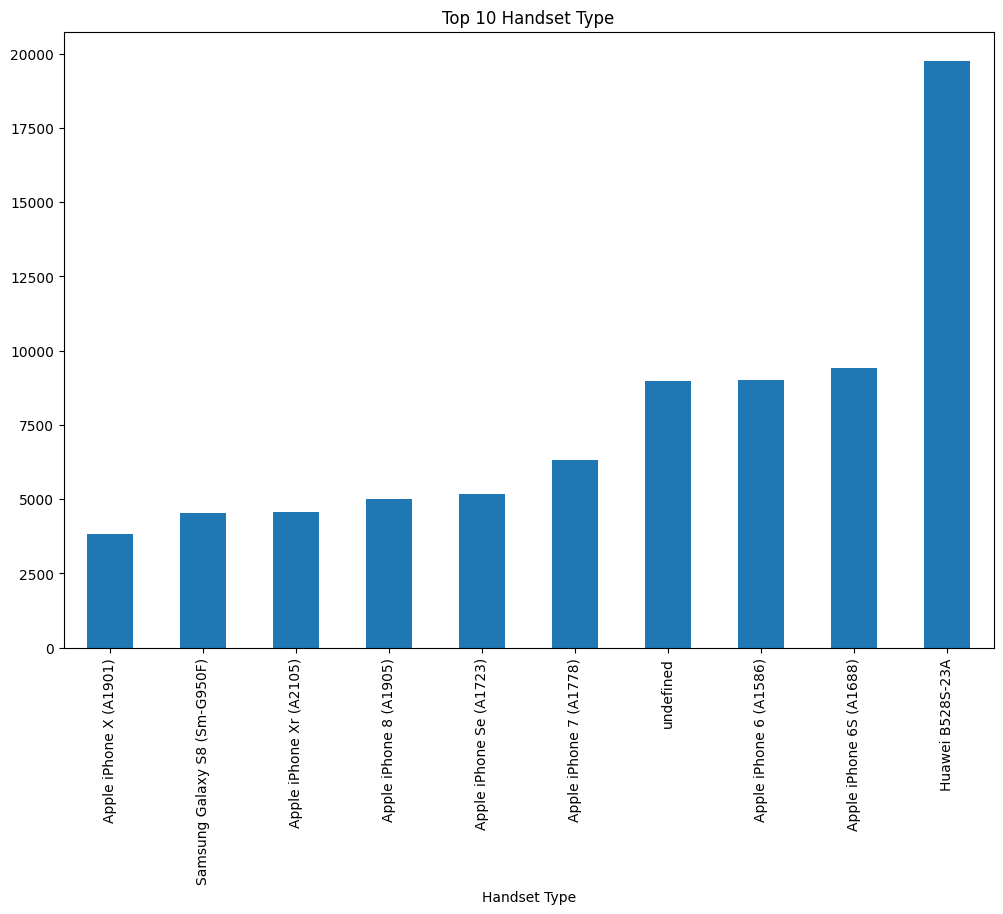

In [11]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_10_handsets.plot(kind='bar', title='Top 10 Handset Type')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show()

# Identify the top 3 handset manufacturers

In [12]:
handset_manufacturers_counts = df['Handset Manufacturer'].value_counts()

In [13]:
top_3_manufacturers = handset_manufacturers_counts.head(3)

In [14]:
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


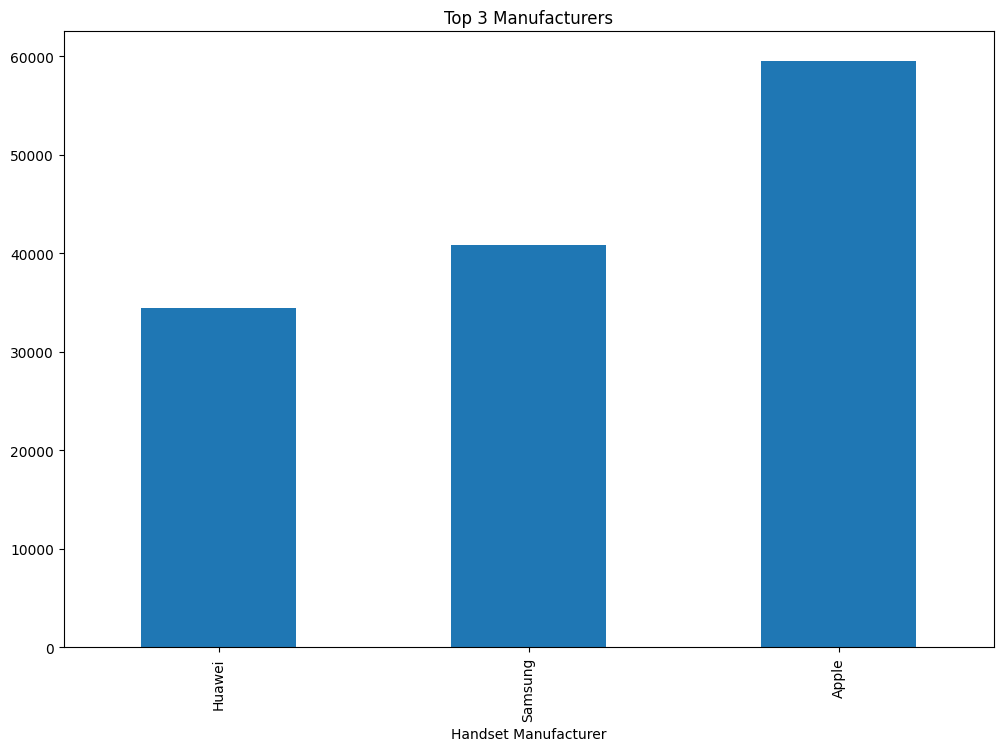

In [15]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_3_manufacturers.plot(kind='bar', title='Top 3 Manufacturers')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show() 

# Identify the top 5 handsets per top 3 handset manufacturer

In [16]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

In [17]:
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers)]

In [18]:
top_handsets_per_manufacturer = filtered_df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

In [19]:
print(top_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

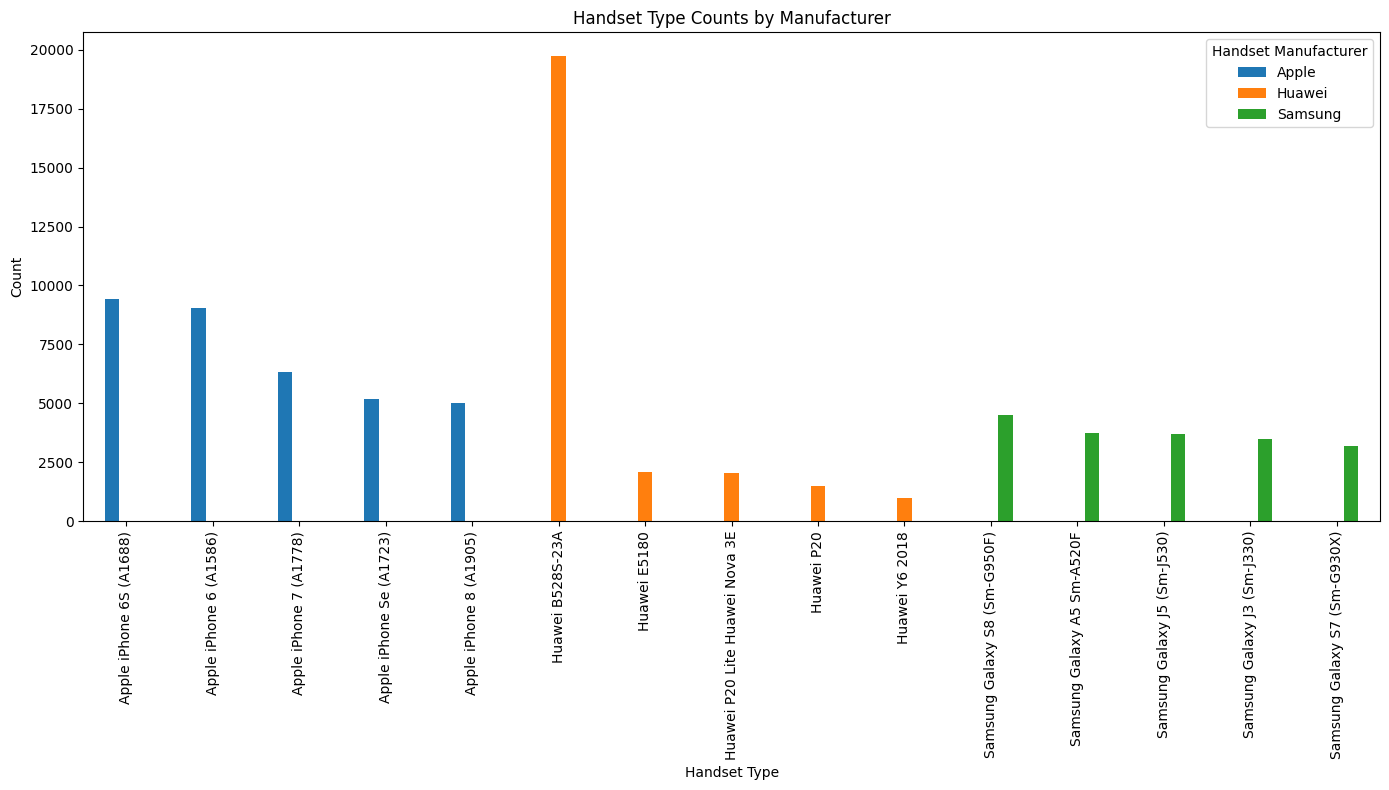

In [20]:
# Plotting the data
top_handsets_per_manufacturer.unstack(level=0).plot(kind='bar', figsize=(14, 8))  # Unstack the Manufacturer level to separate them in the plot

# Customizing the plot
plt.title('Handset Type Counts by Manufacturer')
plt.ylabel('Count')
plt.xlabel('Handset Type')
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical for better readability
plt.legend(title="Handset Manufacturer")
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

# Task 1.1

In [21]:
# Aggregate per user
aggregated_data = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Bearer Id', lambda x: df.loc[x.index, 'Social Media DL (Bytes)'].sum() + df.loc[x.index, 'Social Media UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Youtube DL (Bytes)'].sum() + df.loc[x.index, 'Youtube UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Netflix DL (Bytes)'].sum() + df.loc[x.index, 'Netflix UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Google DL (Bytes)'].sum() + df.loc[x.index, 'Google UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Email DL (Bytes)'].sum() + df.loc[x.index, 'Email UL (Bytes)'].sum() +
                       df.loc[x.index, 'Gaming DL (Bytes)'].sum() + df.loc[x.index, 'Gaming UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Other DL (Bytes)'].sum() + df.loc[x.index, 'Other UL (Bytes)'].sum()
            )
)

In [22]:
# Reset the index to make 'MSISDN/Number' a column
aggregated_data = aggregated_data.reset_index()

In [23]:
aggregated_data

,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,1.255788e+09
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,4.364173e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,1.091053e+09
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.475687e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2.235055e+09
...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0,1.006033e+09
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0,6.849434e+08
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0,6.998021e+08
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0,7.406419e+08


In [24]:
# Display the result
print(aggregated_data.head(10))

   MSISDN/Number  number_of_xDR_sessions  total_session_duration  \
0   3.360100e+10                       1                116720.0   
1   3.360100e+10                       1                181230.0   
2   3.360100e+10                       1                134969.0   
3   3.360101e+10                       1                 49878.0   
4   3.360101e+10                       2                 37104.0   
5   3.360101e+10                       2                253983.0   
6   3.360101e+10                       2                128360.0   
7   3.360101e+10                       1                 86399.0   
8   3.360101e+10                       2                495702.0   
9   3.360102e+10                       1                124854.0   

   total_download_data  total_upload_data  total_data_volume  
0         8.426375e+08         36053108.0       1.255788e+09  
1         1.207552e+08         36104459.0       4.364173e+08  
2         5.566597e+08         39306820.0       1.091053e+09  

# Task-1.2

# Check if there is a null value

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [27]:
# Select only numeric columns for mean imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [28]:
# Calculate mean of numeric columns
mean_values = df[numeric_cols].mean()

In [29]:
# Replace missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(mean_values)

In [30]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)             

In [31]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

In [32]:
# Handle missing values in non-numeric columns
for col in non_numeric_cols:
    most_frequent = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col] = df[col].fillna(most_frequent)

In [33]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                       

#  Relevant variables and associated data types

In [34]:
# Define a function to replace outliers with the mean of the column
def treat_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, df[col].mean(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mean(), df[col])
        
treat_outliers(df)

In [35]:
# Print the data types and a summary of the dataset
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Data Types:
 Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64

# Variable transformations

In [36]:
# Step 1: Calculate total data (DL + UL)
df['total_data(DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Step 2: Calculate the decile ranks for each user based on 'session_duration'
df['decile_rank'] = pd.qcut(df['Dur. (ms).1'], 10, labels=False) + 1


In [37]:
#Filter the top five decile classes (decile 6 to 10)
top_five_deciles = df[df['decile_rank'] >= 6]

In [38]:
#Group by decile class and compute the total data per decile
total_data_per_decile = top_five_deciles.groupby('decile_rank')['total_data(DL+UL)'].sum().reset_index()

In [39]:
# Rename columns for better understanding
total_data_per_decile.columns = ['decile_class', 'total_data(DL+UL)']

In [40]:
# Display the result
print(total_data_per_decile)

   decile_class  total_data(DL+UL)
0             6       7.387816e+12
1             7       8.309155e+12
2             8       6.514730e+12
3             9       7.465798e+12
4            10       7.482873e+12


In [41]:
# Analyze basic metrics
basic_metrics = df.describe(include=[np.number])
print("\nBasic Metrics:\n", basic_metrics)


Basic Metrics:
           Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501760e+10  4.847455e+13        67.089326   
std    3.326134e+08   3.060067e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.3

# The alternative way for basic metrics

In [42]:
# Basic Descriptive Statistics for the Dataset
basic_metrics = df.describe()

In [43]:
# Calculate mode (most frequent value for categorical and numerical columns)
mode_metrics = df.mode().iloc[0] 

In [44]:
# Find columns that contain non-numeric data (object type)
non_numeric_cols = df.select_dtypes(include=['object']).columns



# Select only numeric columns for analysis
numeric_df = df.select_dtypes(include=[float, int])
# Now perform your statistical operations on numeric_df
variance_metrics = numeric_df.var()

In [45]:
# Calculate skewness (measure of the asymmetry of the data)
skewness_metrics = numeric_df.skew()

In [46]:
# Calculate kurtosis (measure of the tail-heaviness of the data)
kurtosis_metrics = numeric_df.kurt()

In [47]:
# Median (already included for numerical columns in 'describe()')
median_metrics = numeric_df.median()

In [48]:
# Display results
print("Basic Descriptive Metrics:\n", basic_metrics)
print("\nMode Metrics:\n", mode_metrics)
print("\nMedian Metrics:\n", median_metrics)
print("\nVariance Metrics:\n", variance_metrics)
print("\nSkewness Metrics:\n", skewness_metrics)
print("\nKurtosis Metrics:\n", kurtosis_metrics)

Basic Descriptive Metrics:
           Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501760e+10  4.847455e+13        67.089326   
std    3.326134e+08   3.060067e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.08201

# Importance of These Metrics for the Global Objective:
Understanding User Behavior: Metrics like mean, median, mode, and skewness give insights into typical and extreme user behaviors. For example, understanding how the average session duration compares to the most common duration (mode) can reveal important patterns.

Data Distribution and Consistency: Variance, skewness, and kurtosis help to assess how consistent the dataset is. For business objectives, understanding variability and outliers is key to identifying patterns, anomalies, and areas that require further investigation.

These metrics provide a foundational analysis that can inform more advanced analytics and guide decision-making processes in the context of data analysis.

# Non Graphical Univariate Analysis

To perform Non-Graphical Univariate Analysis and compute dispersion parameters for each quantitative variable, you can use Python with pandas. Dispersion parameters, such as variance, standard deviation, range, interquartile range (IQR), and others, provide insight into how spread out the data is. Here's how you can compute these metrics and interpret them.

In [49]:
# Select only quantitative variables (numerical columns)
quantitative_df = df.select_dtypes(include=[float, int])

# Calculate Variance
variance = quantitative_df.var()

# Calculate Standard Deviation
std_dev = quantitative_df.std()

# Calculate Range (Max - Min)
data_range = quantitative_df.max() - quantitative_df.min()

# Calculate Interquartile Range (IQR)
IQR = quantitative_df.quantile(0.75) - quantitative_df.quantile(0.25)


In [50]:
# Compile results into a DataFrame for easier interpretation
dispersion_metrics = pd.DataFrame({
    'Variance': variance,
    'Standard Deviation': std_dev,
    'Range': data_range,
    'Interquartile Range (IQR)': IQR
})

In [51]:
# Display the metrics
print(dispersion_metrics)

                                              Variance  Standard Deviation  \
Bearer Id                                 8.315146e+36        2.883600e+18   
Start ms                                  8.329624e+04        2.886109e+02   
End ms                                    8.299970e+04        2.880967e+02   
Dur. (ms)                                 2.435320e+09        4.934896e+04   
IMSI                                      1.106317e+17        3.326134e+08   
MSISDN/Number                             9.364011e+18        3.060067e+09   
IMEI                                      5.005776e+26        2.237359e+13   
Avg RTT DL (ms)                           1.530621e+03        3.912316e+01   
Avg RTT UL (ms)                           7.642048e+01        8.741881e+00   
Avg Bearer TP DL (kbps)                   1.577888e+08        1.256140e+04   
Avg Bearer TP UL (kbps)                   5.479568e+05        7.402410e+02   
TCP DL Retrans. Vol (Bytes)               9.304972e+13        9.

# Interpretation of the Results:
Variance: Indicates how much the data is spread out from the mean. High variance means that data points are spread out across a large range of values, and low variance indicates that data points are closer to the mean.

Standard Deviation: A more interpretable measure than variance because it is in the same units as the data. A high standard deviation means that the data points are widely dispersed, while a low standard deviation indicates that the data points are closer to the mean.

Range: Provides the total spread of data (max - min). If the range is large, there is significant variation between the smallest and largest values.

Interquartile Range (IQR): Measures the spread of the middle 50% of data. IQR is useful for understanding the spread without being affected by outliers.


# Importance of These Metrics:
Variance and Standard Deviation: Help identify how widely the data points vary from the mean. For example, in a dataset of customer spending, higher variance might indicate a wider disparity in how much different customers spend.

Range and IQR: Help detect extreme values and outliers. A large range might indicate outliers, while IQR focuses on the spread of the central data.

These dispersion metrics are key in understanding the variability and spread of your quantitative data.

# Graphical Univariate Analysis

For Graphical Univariate Analysis, we can use different types of plots depending on the nature of the variable (numerical or categorical). The most suitable options for visualizing univariate data are:

1. Histograms for continuous/numerical variables to show the distribution.
2. Box plots for continuous/numerical variables to show dispersion and outliers.
3. Bar plots for categorical variables to show frequency.
4. KDE plots (Kernel Density Estimate) to show the probability distribution for continuous variables.

In [52]:
# Select numeric columns
quantitative_df = df.select_dtypes(include=[float, int])
# Select categorical columns
categorical_df = df.select_dtypes(include=['object'])

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


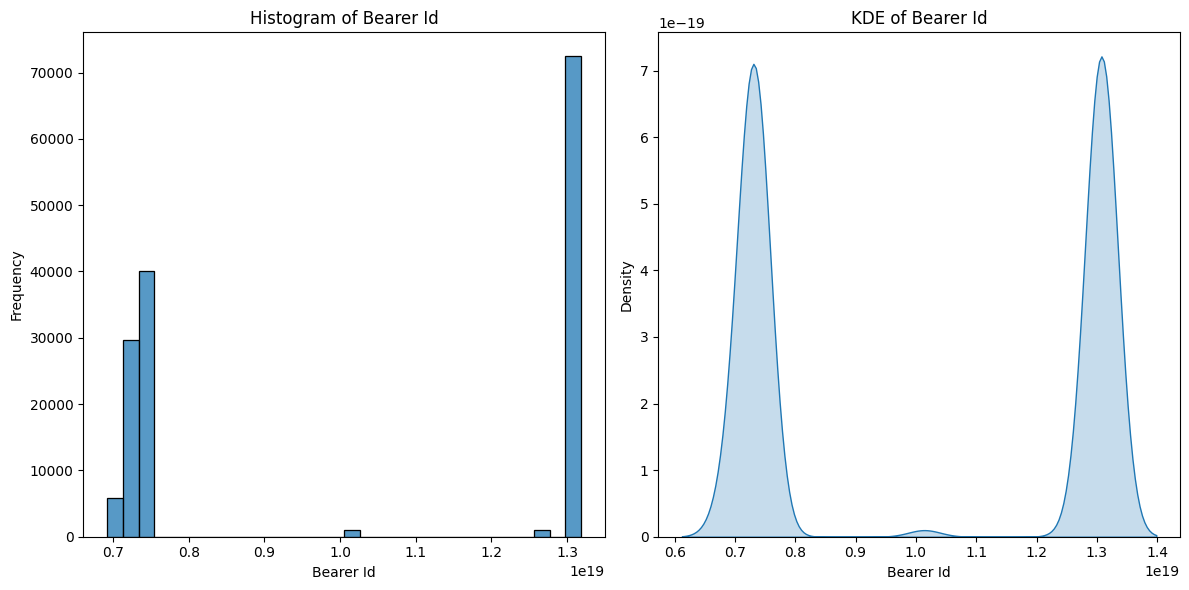

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


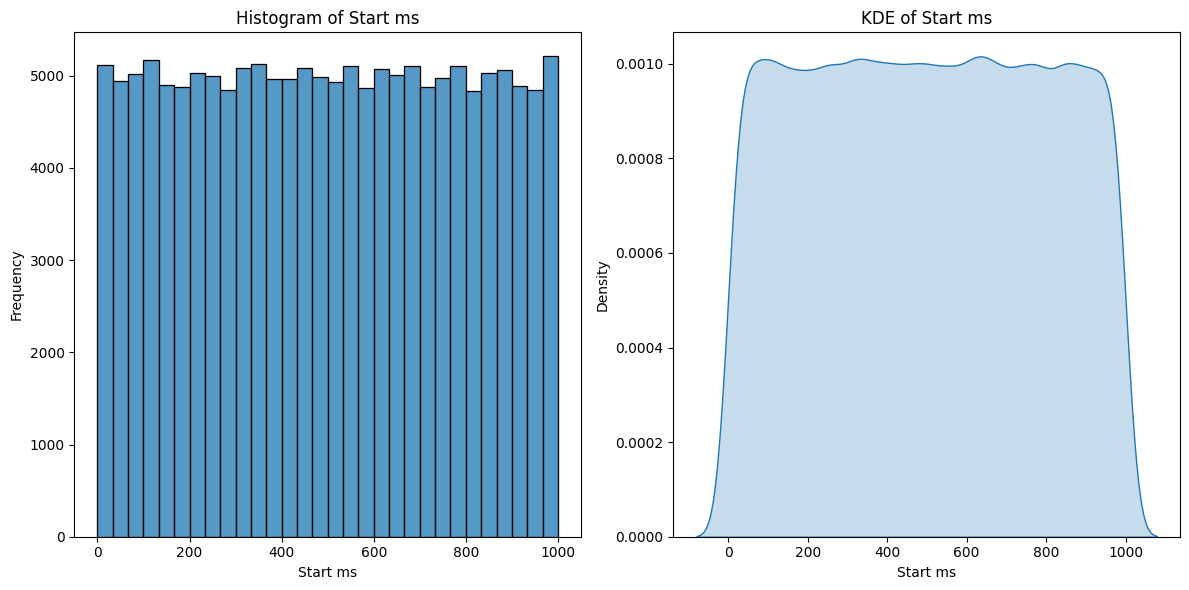

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


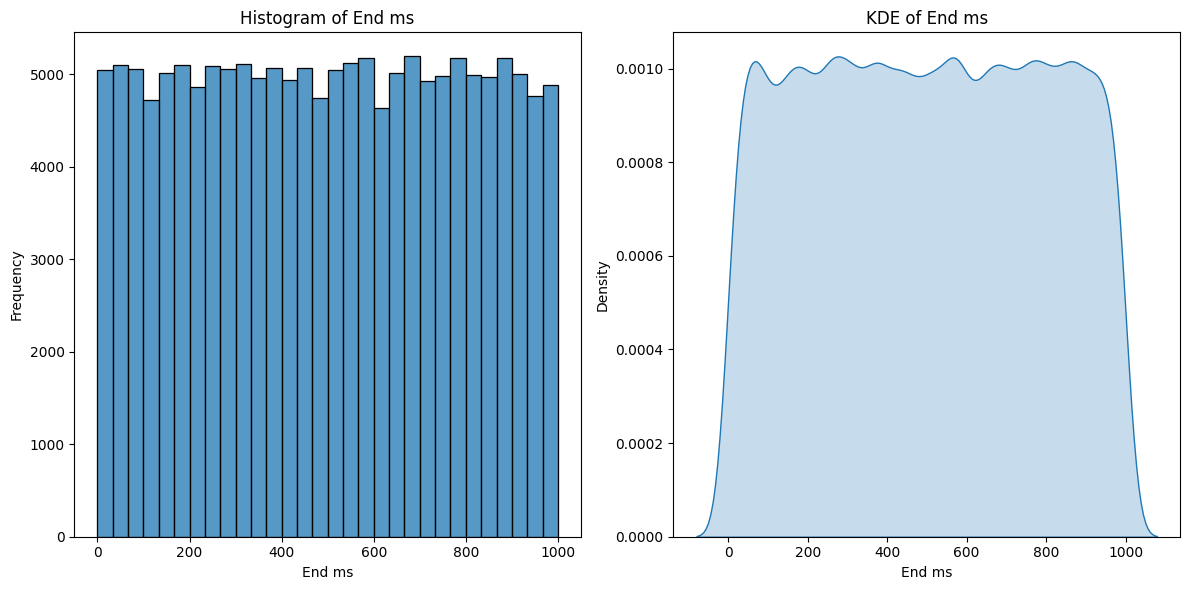

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


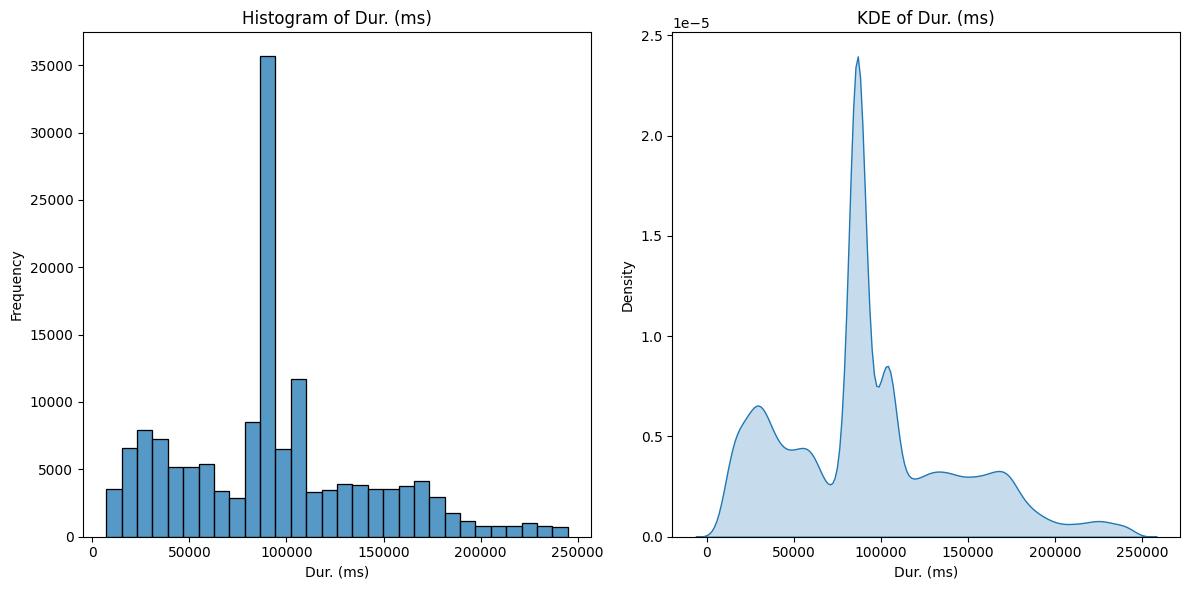

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


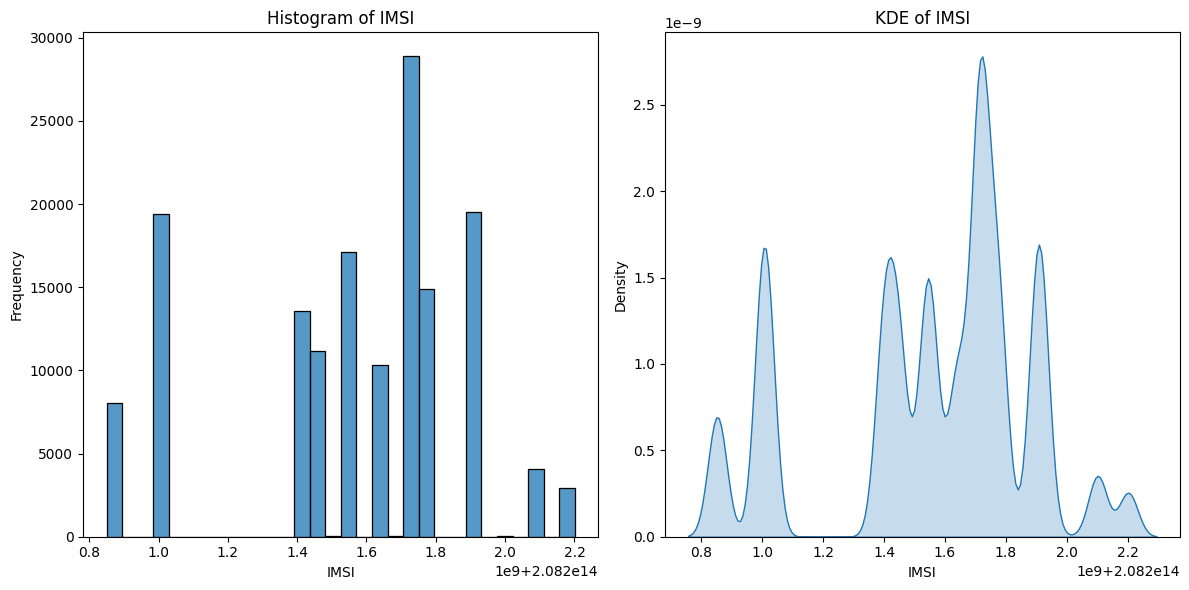

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


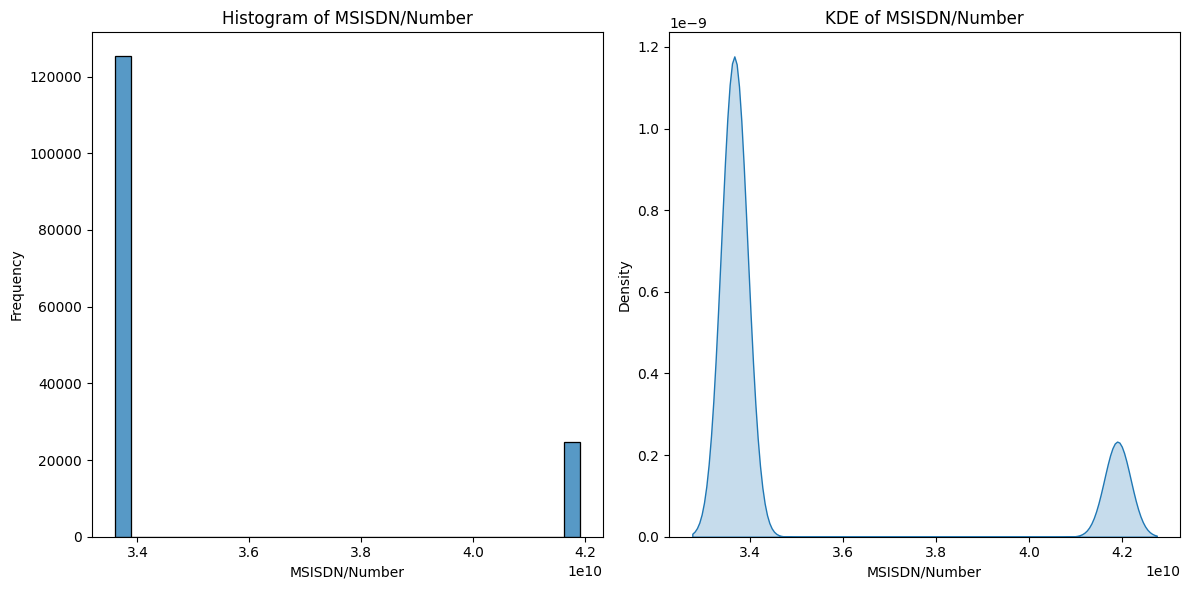

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


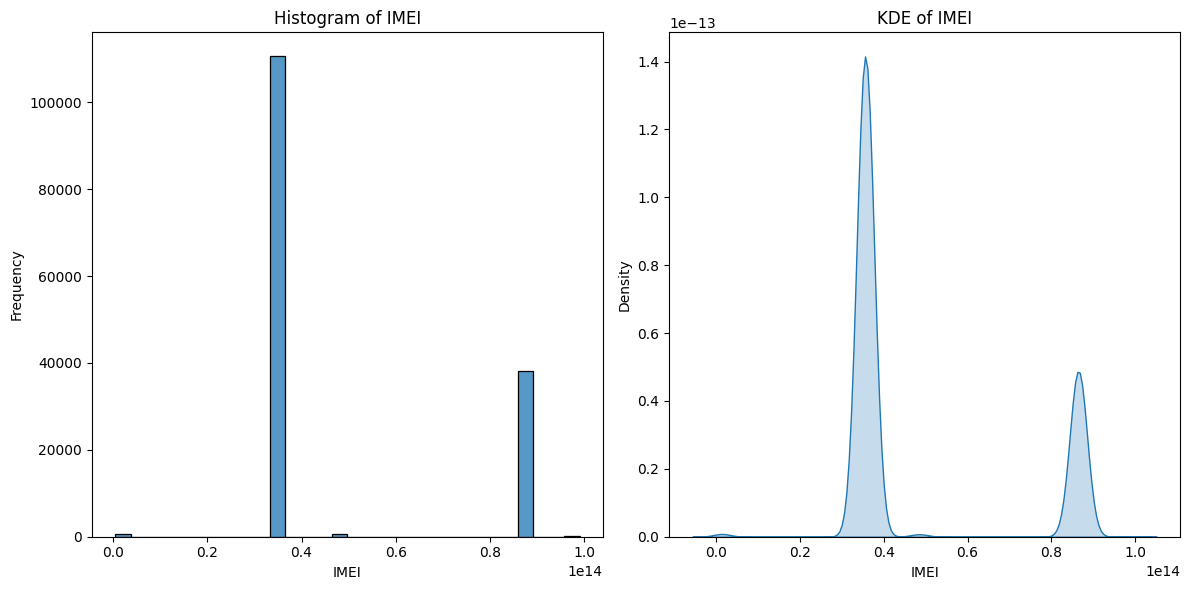

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


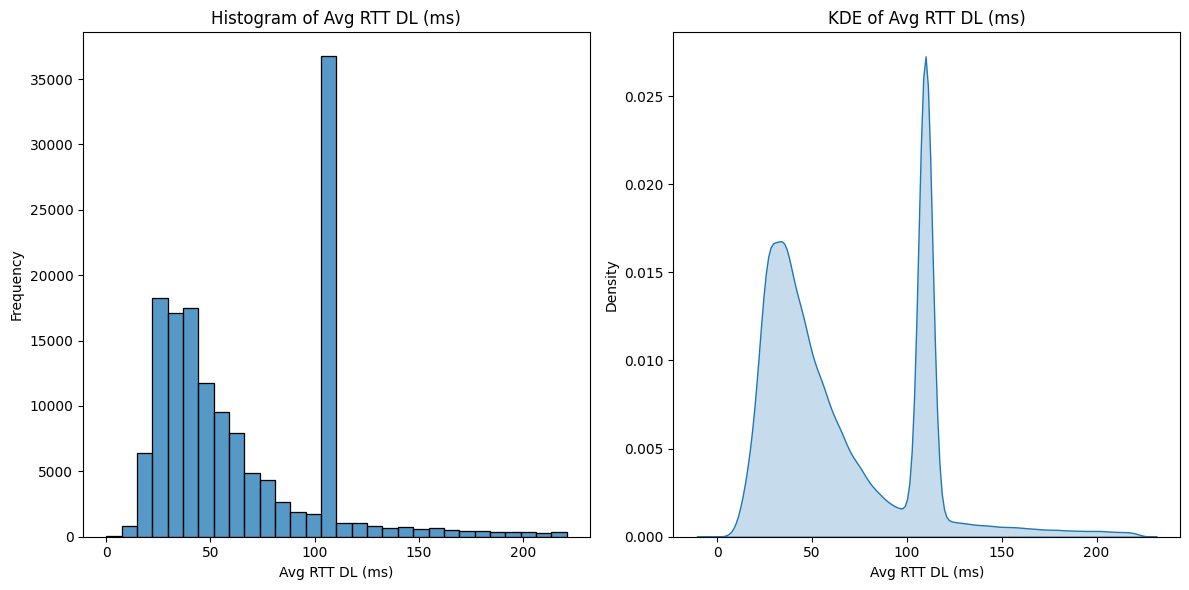

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


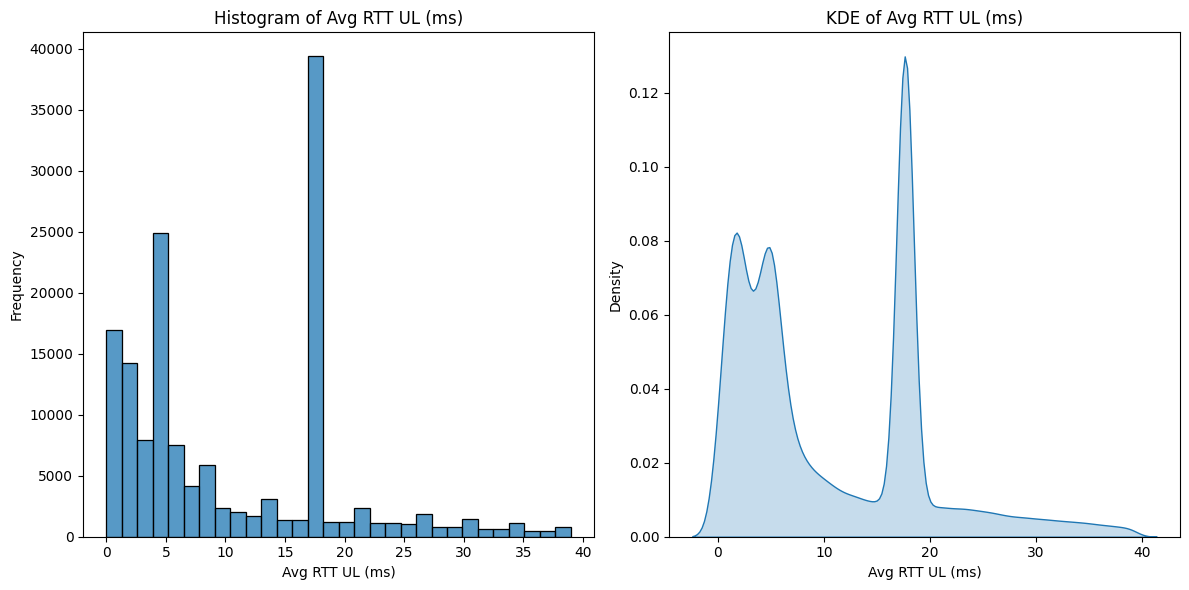

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


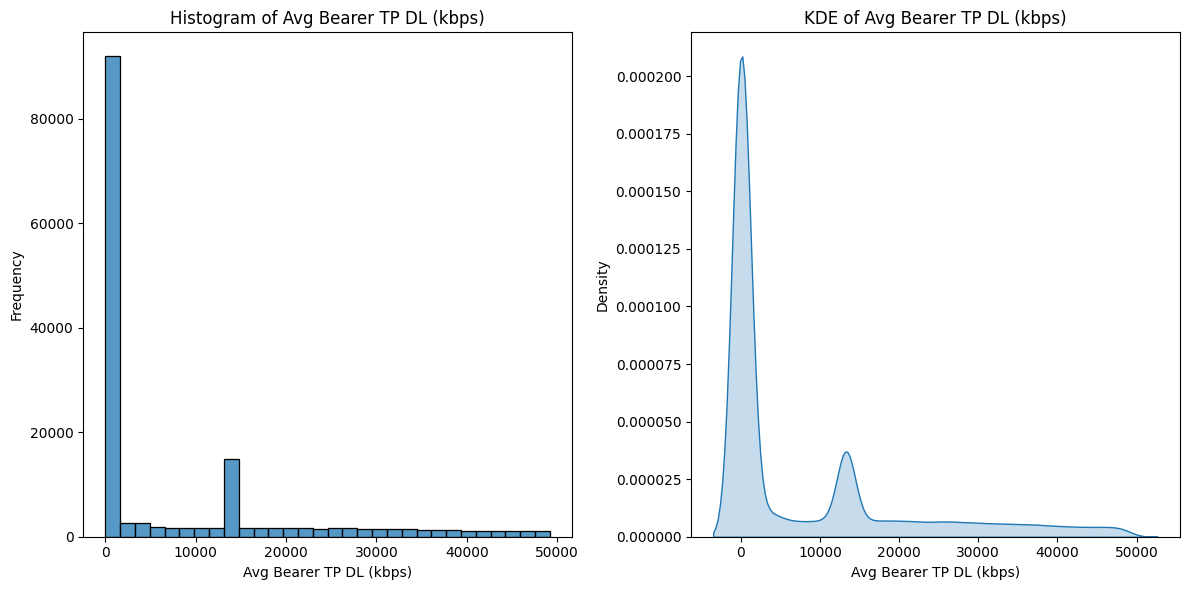

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


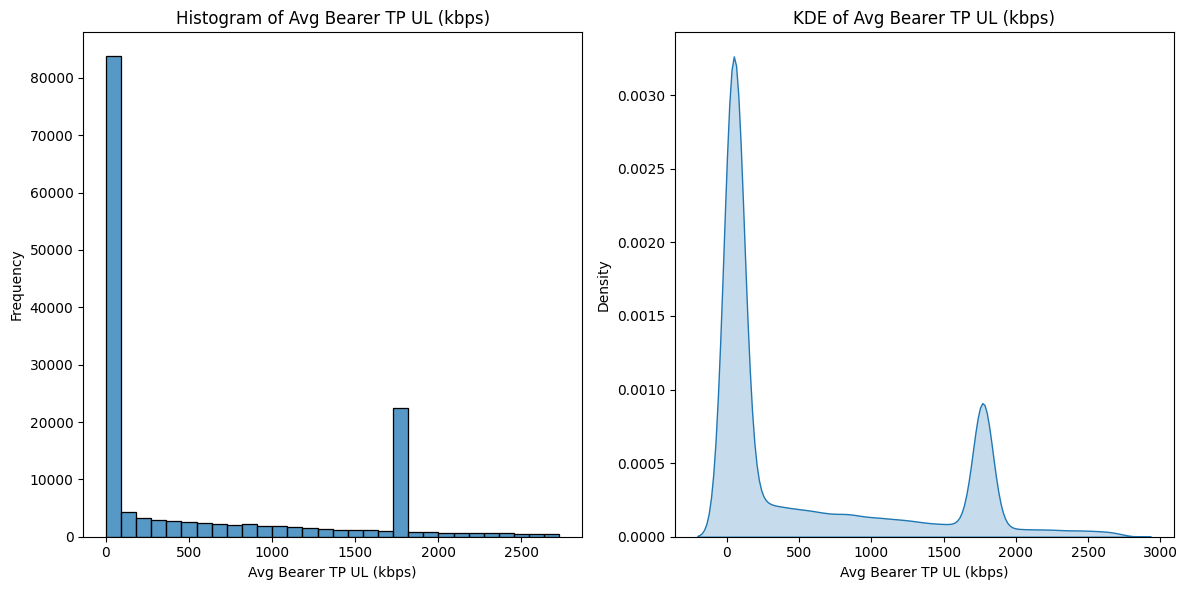

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


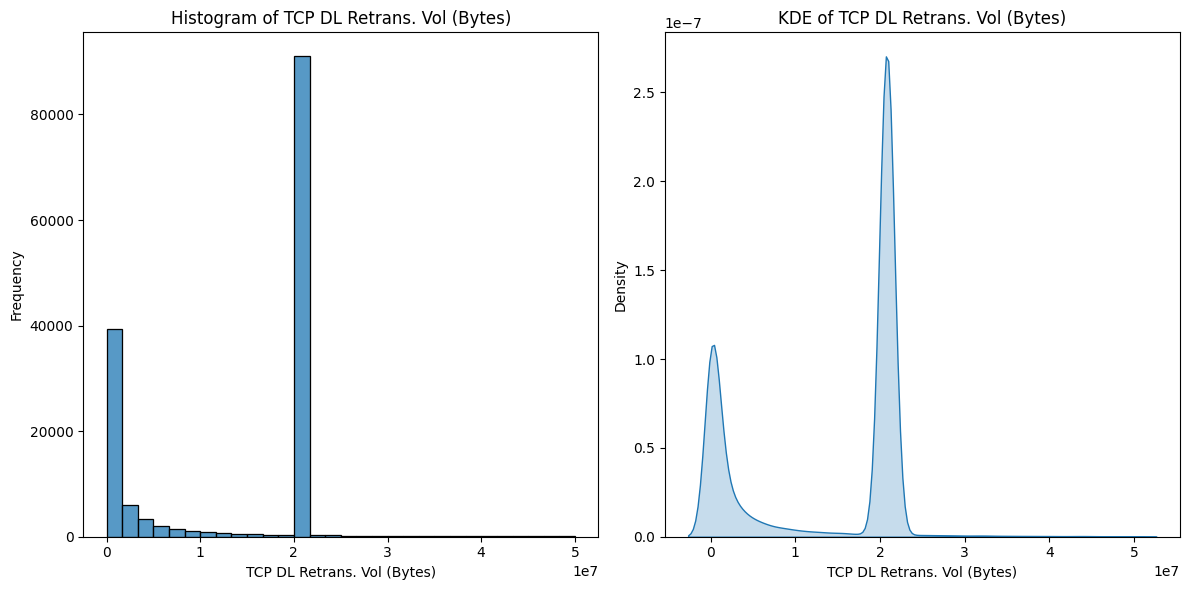

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


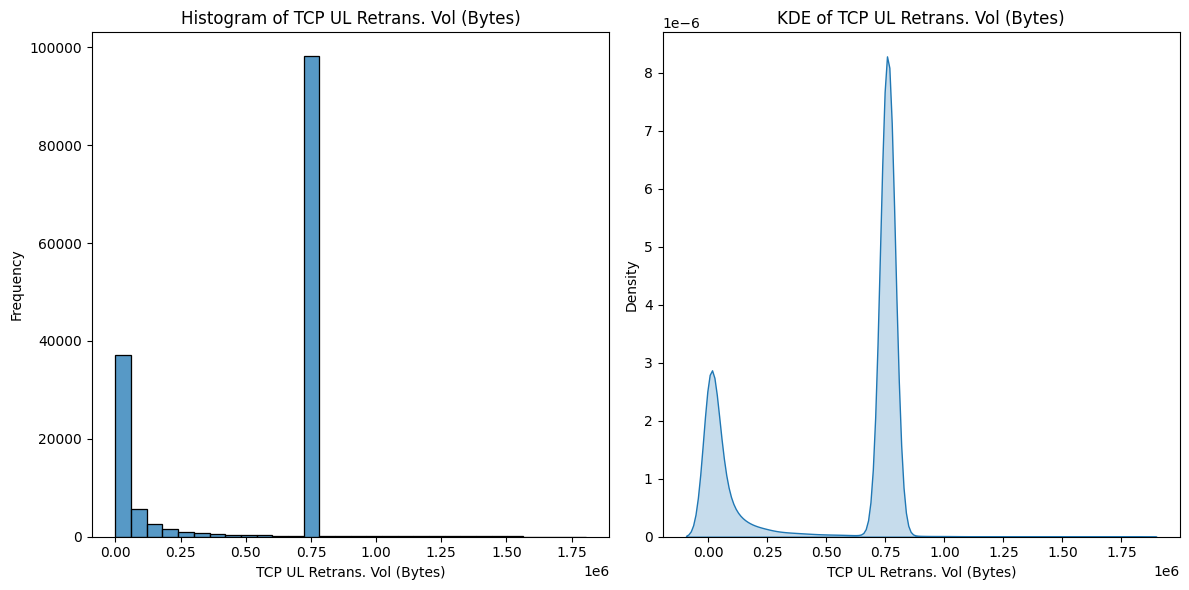

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


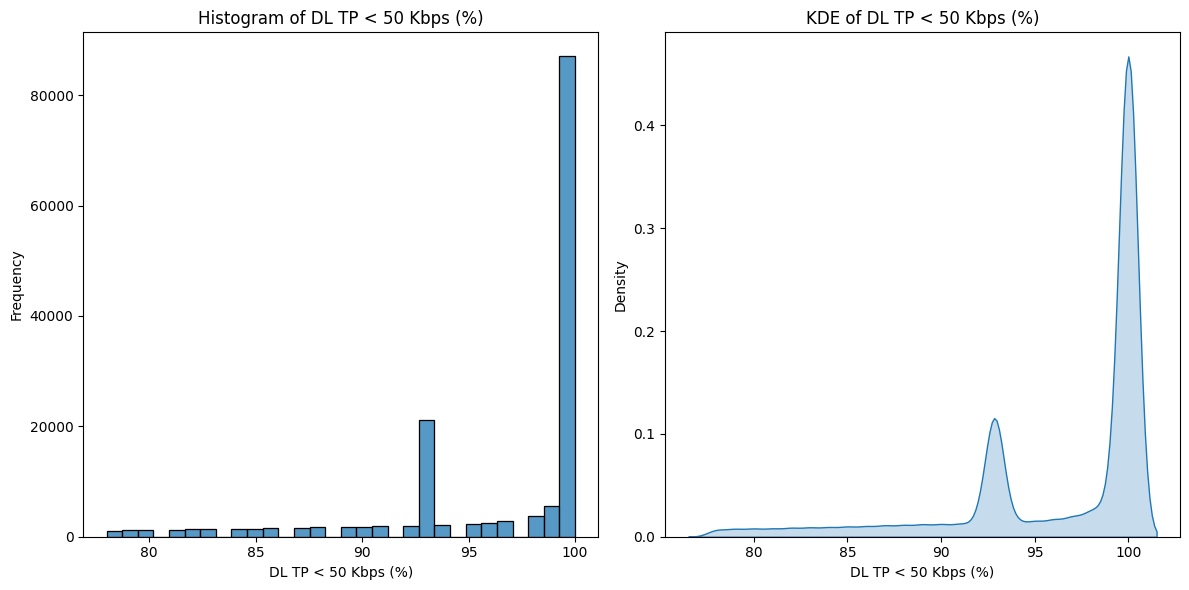

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


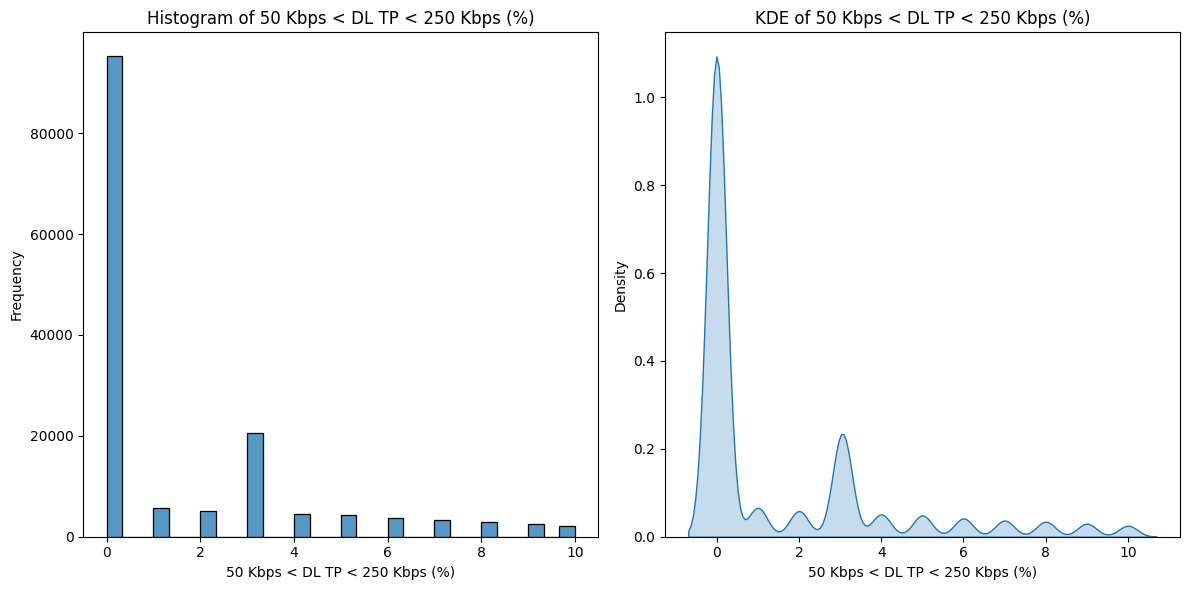

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


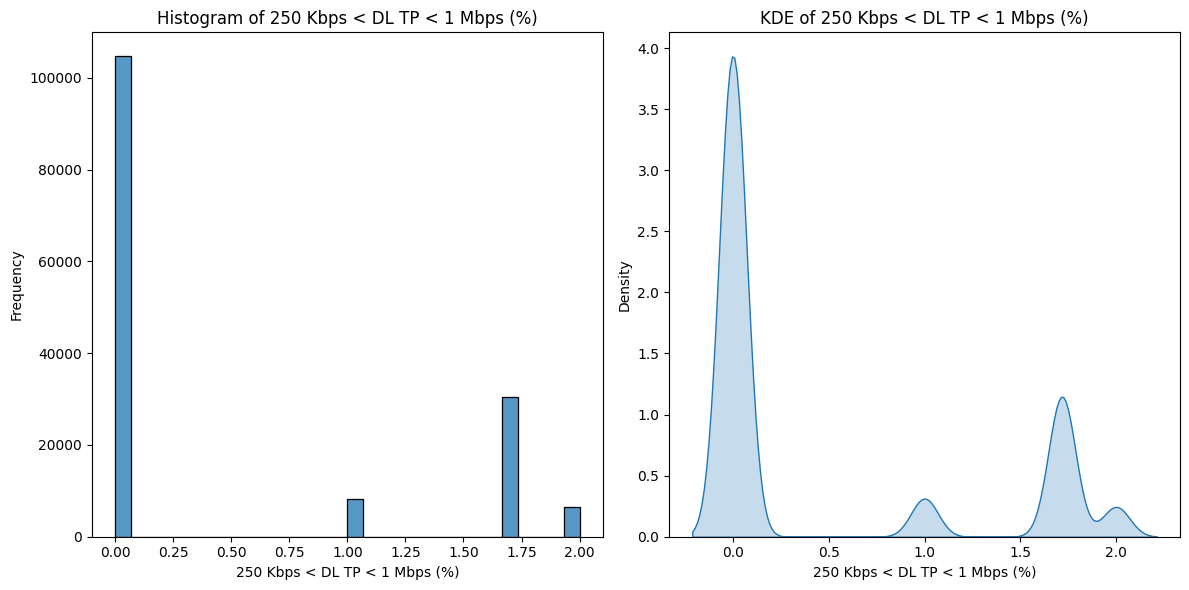

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


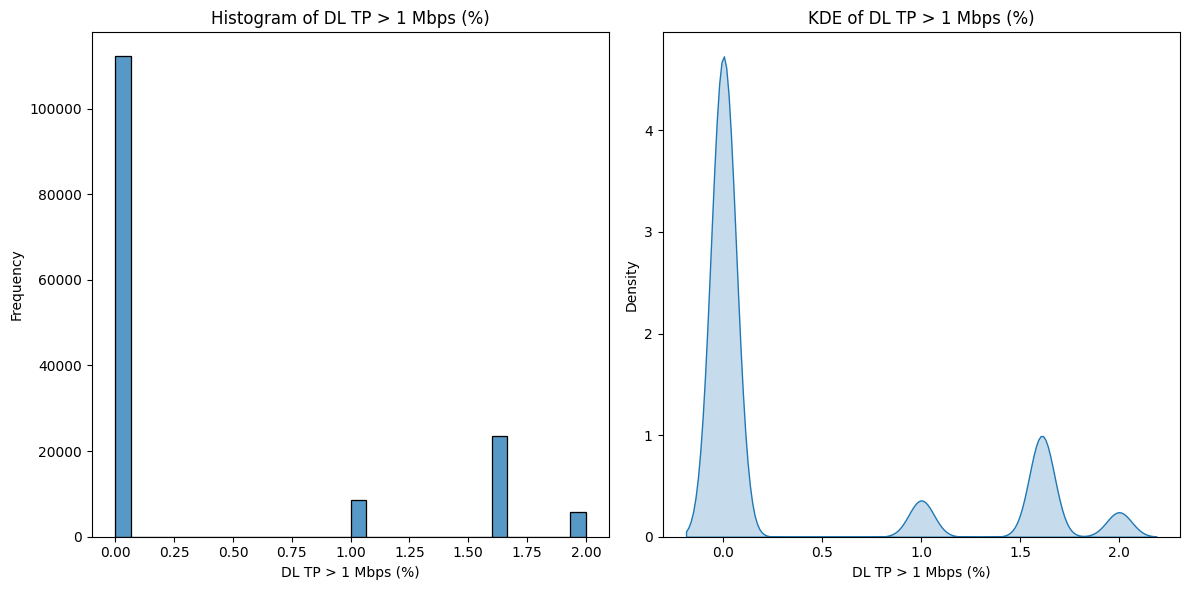

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


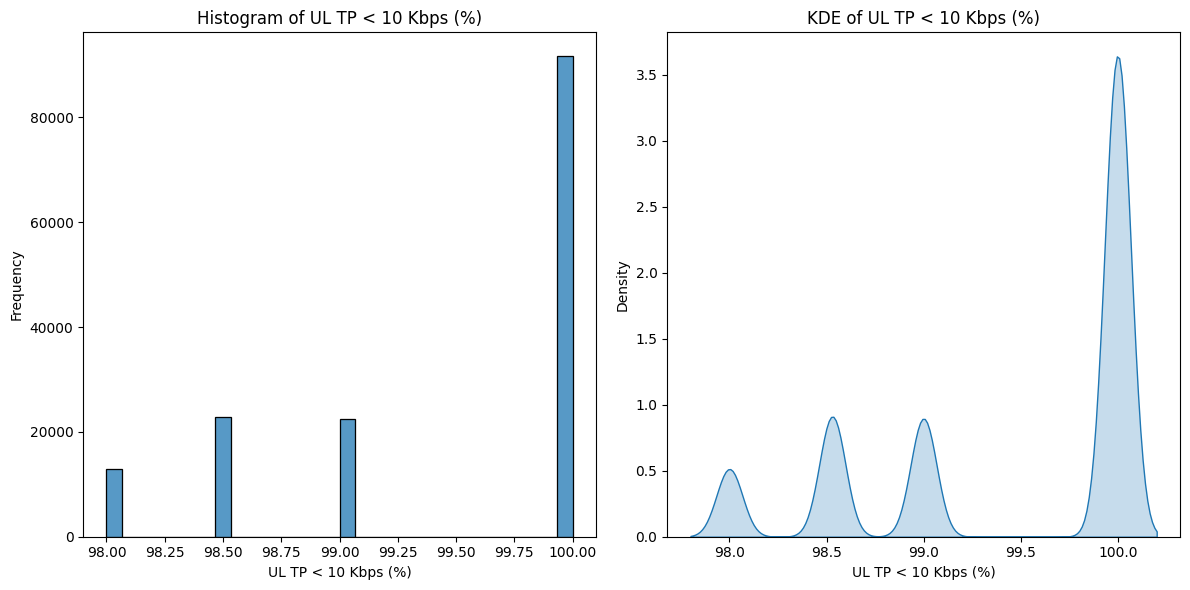

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


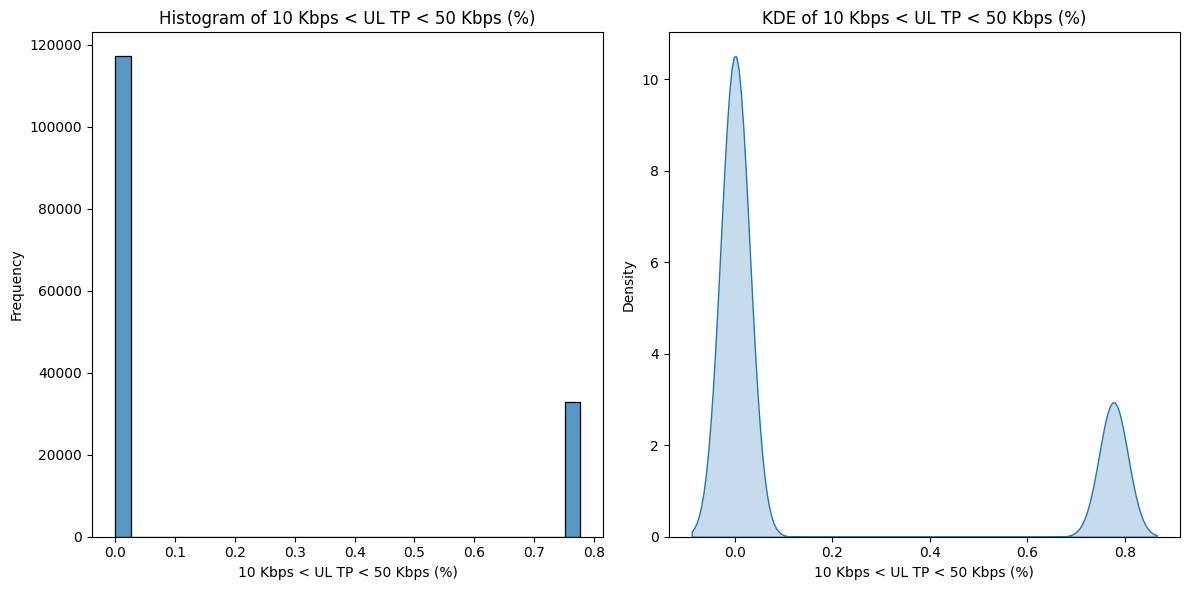

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


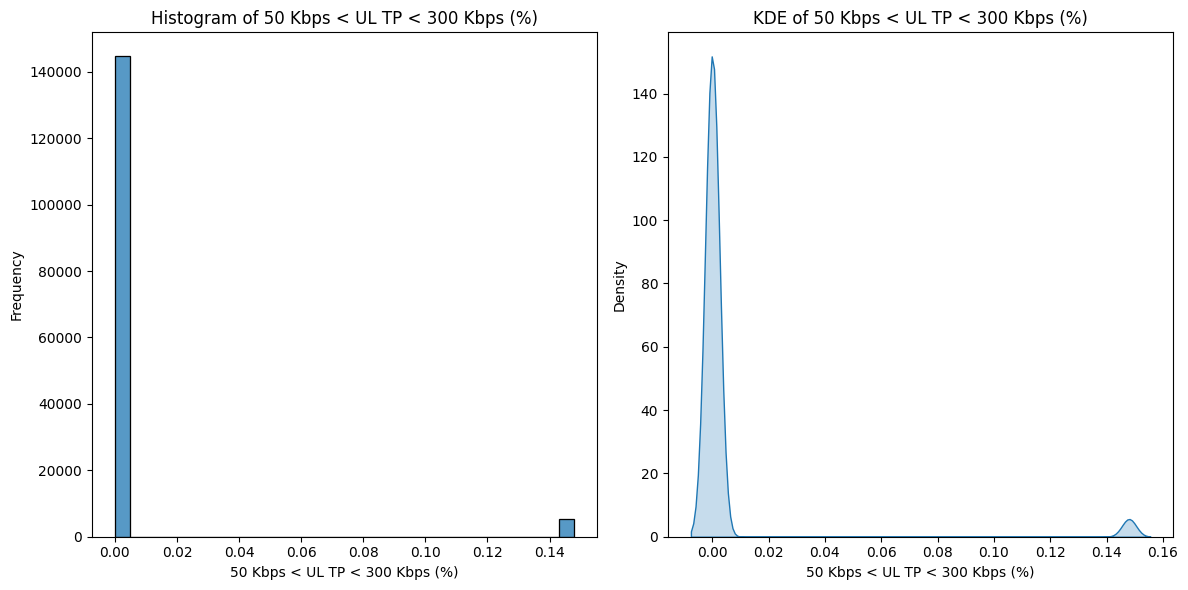

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


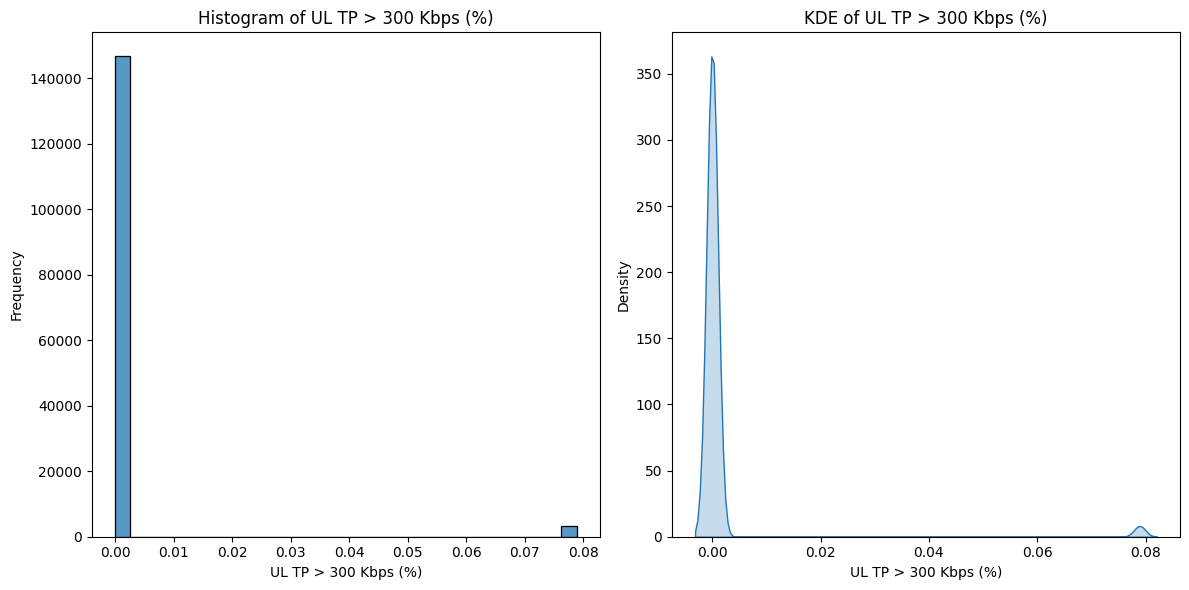

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


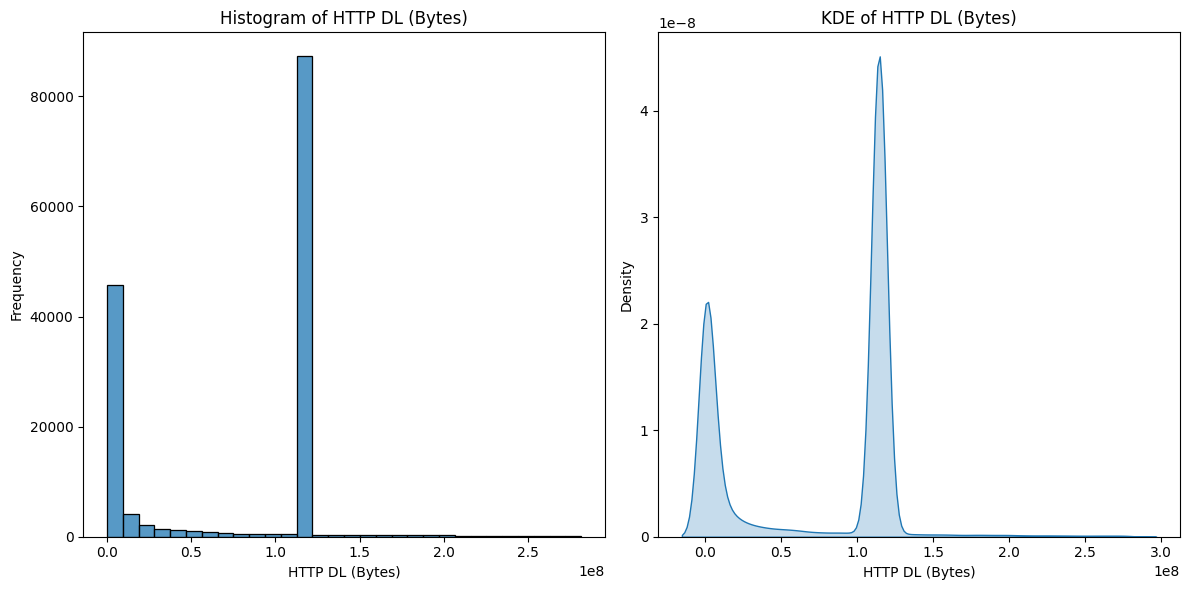

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


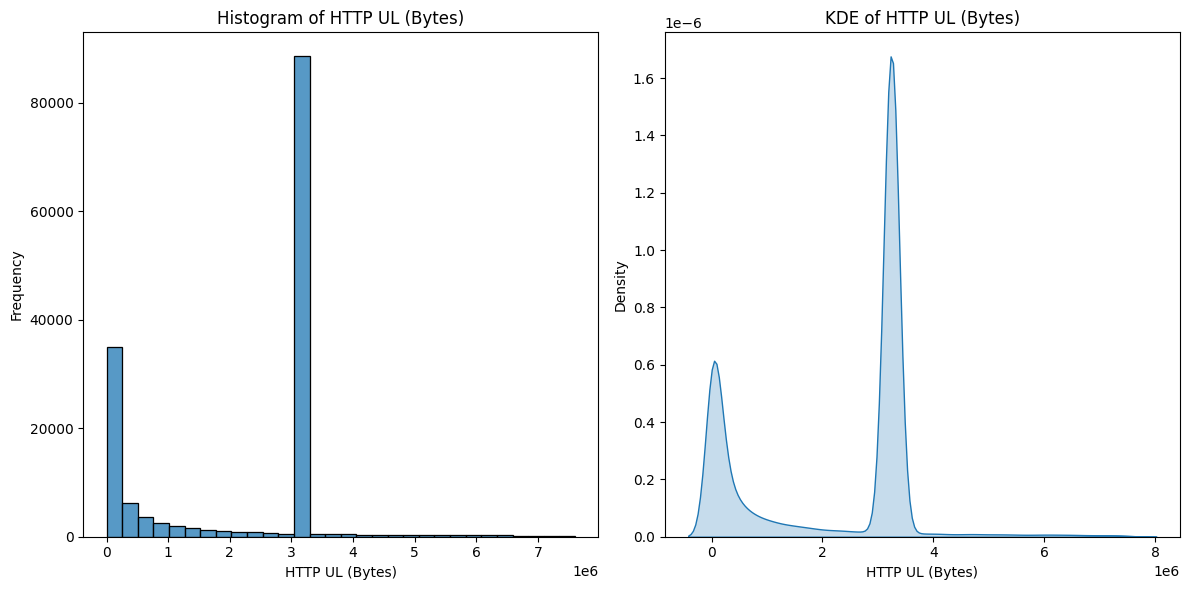

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


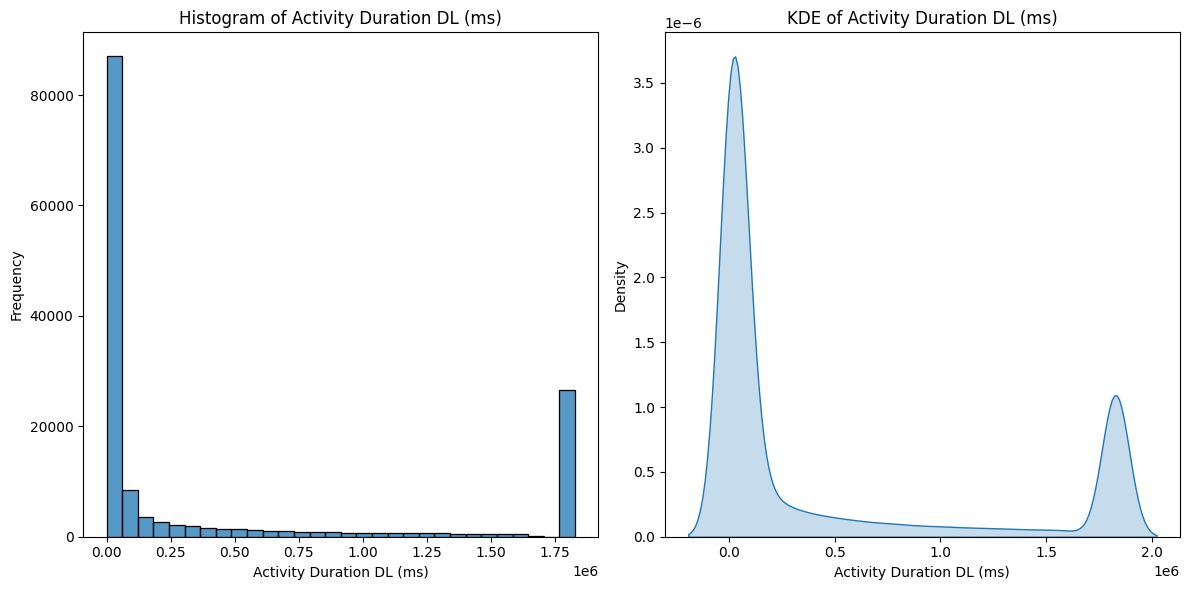

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


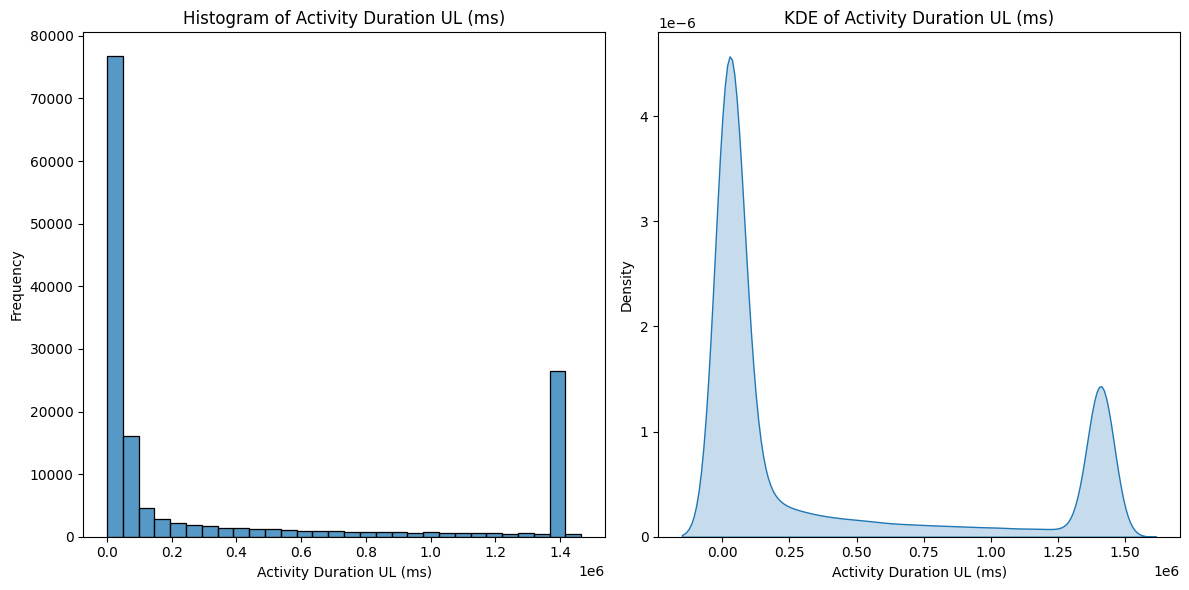

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


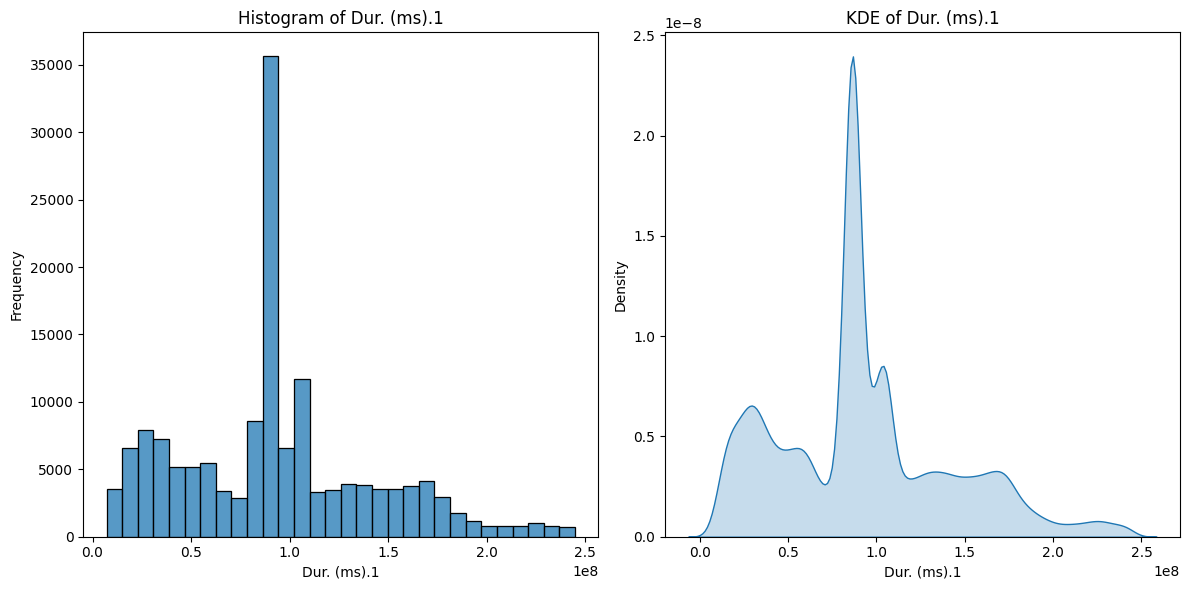

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


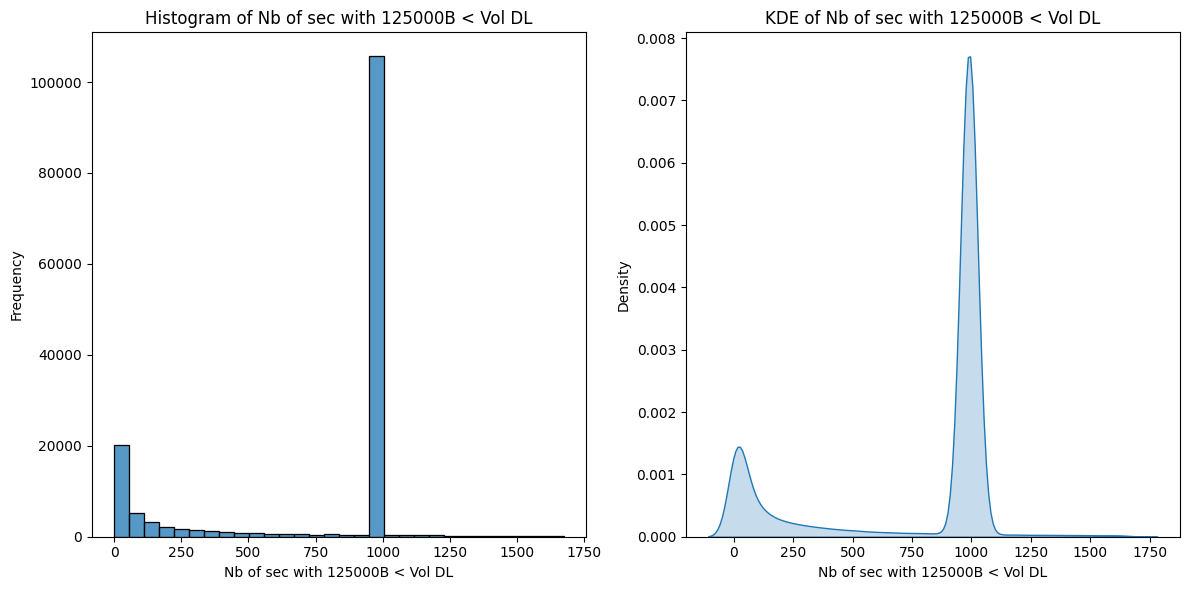

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


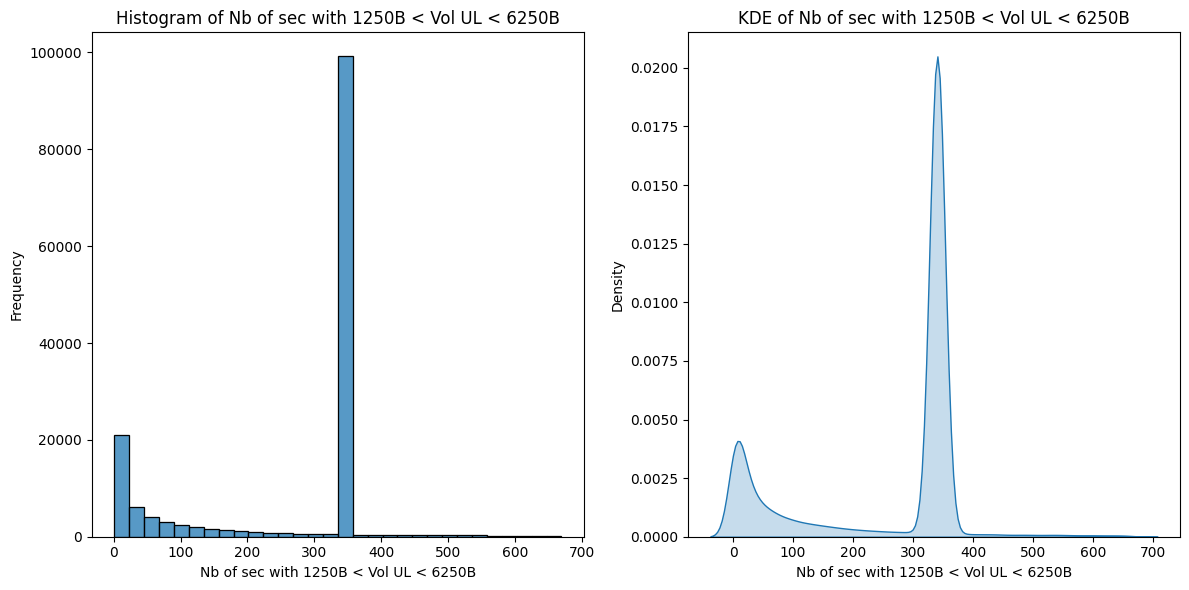

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


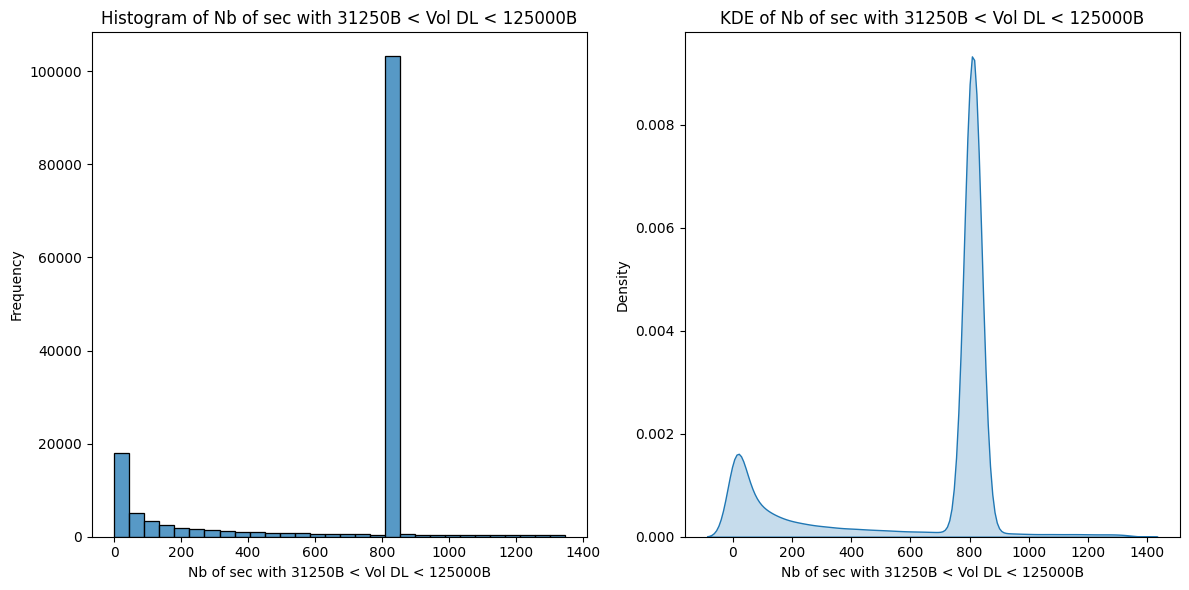

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


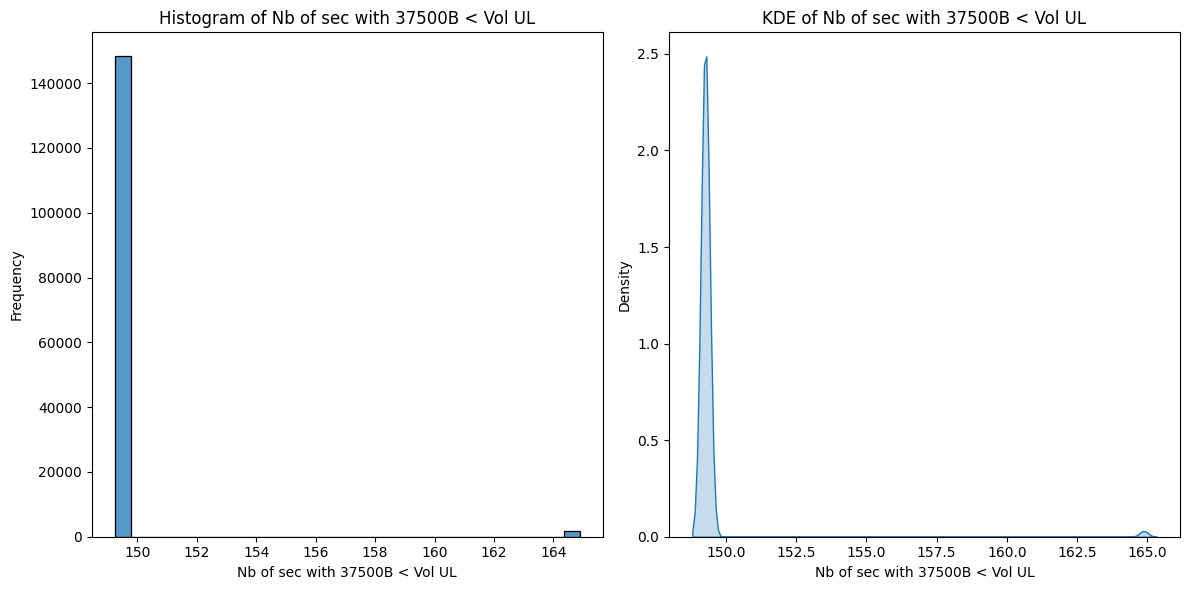

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


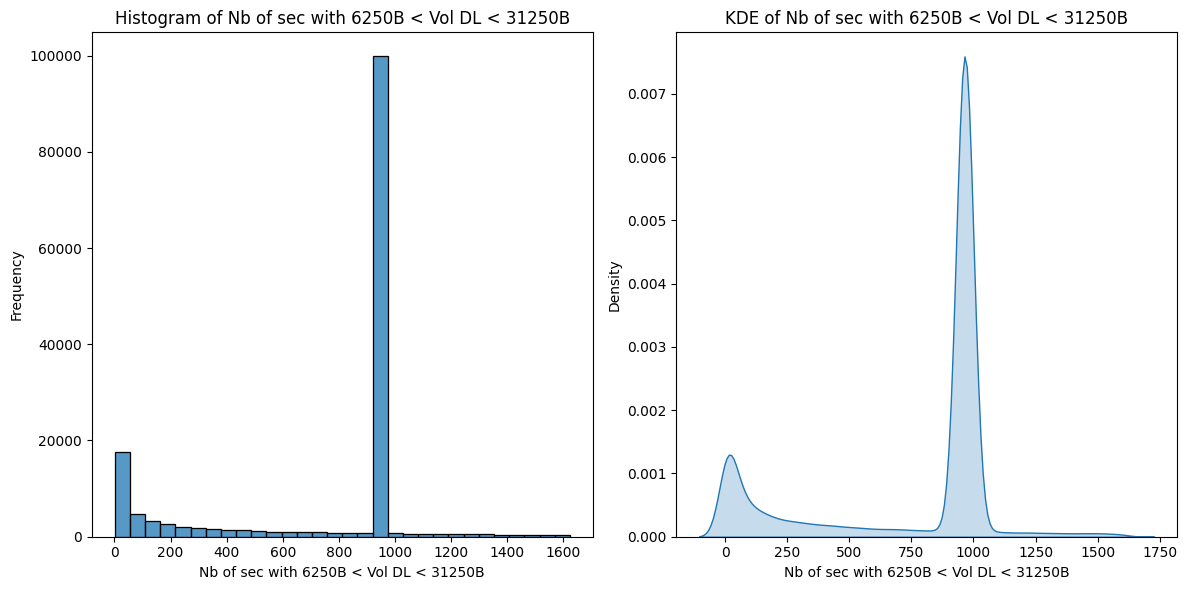

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


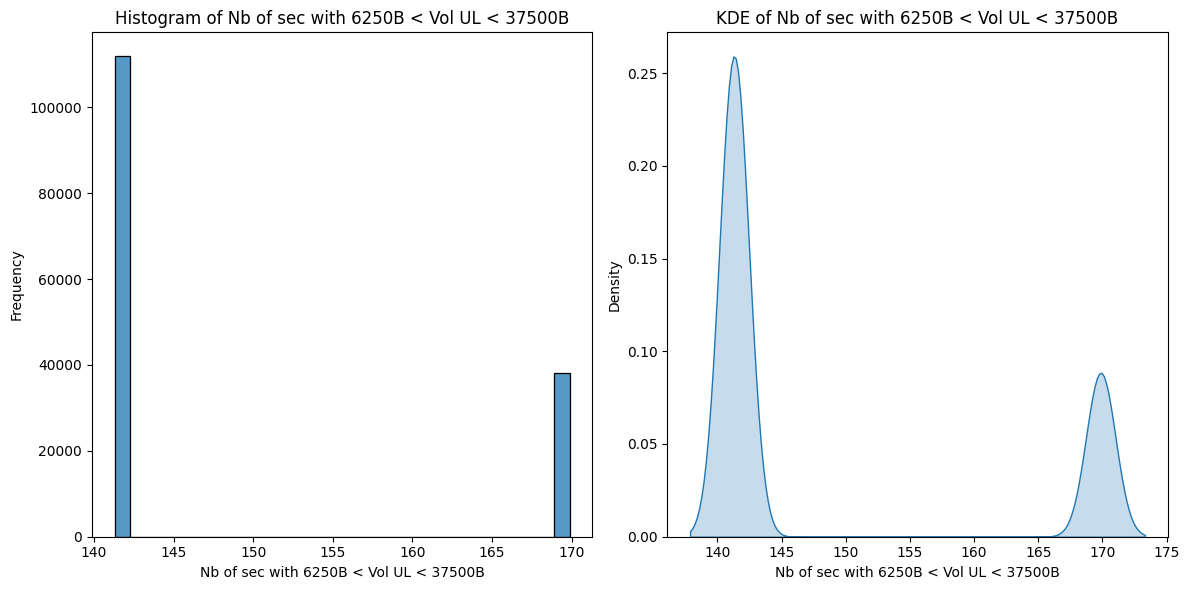

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


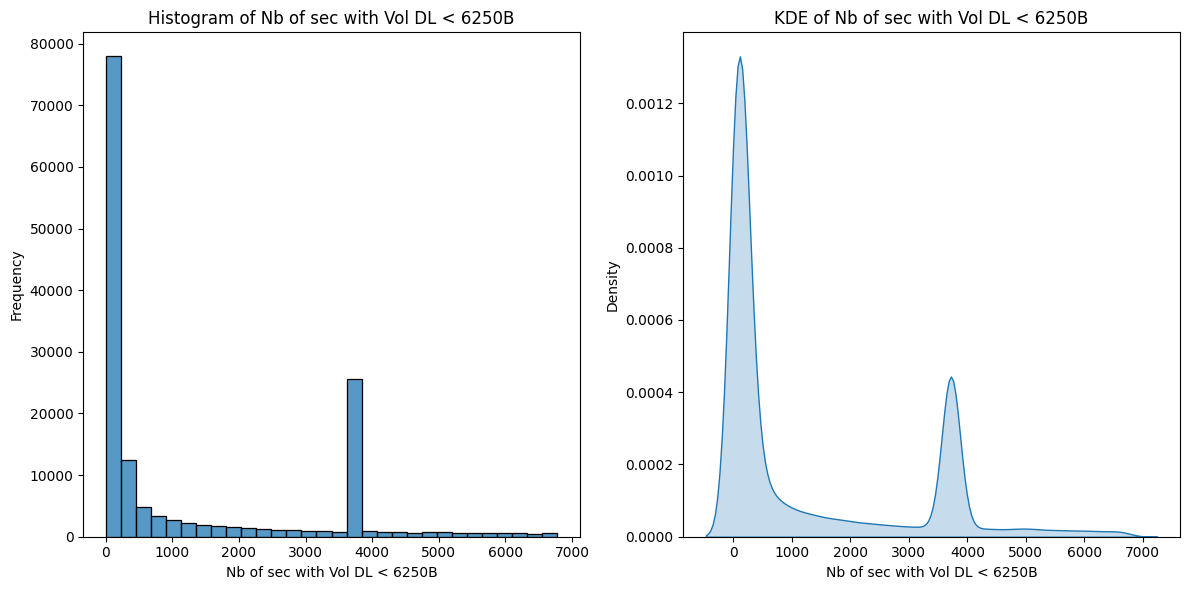

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


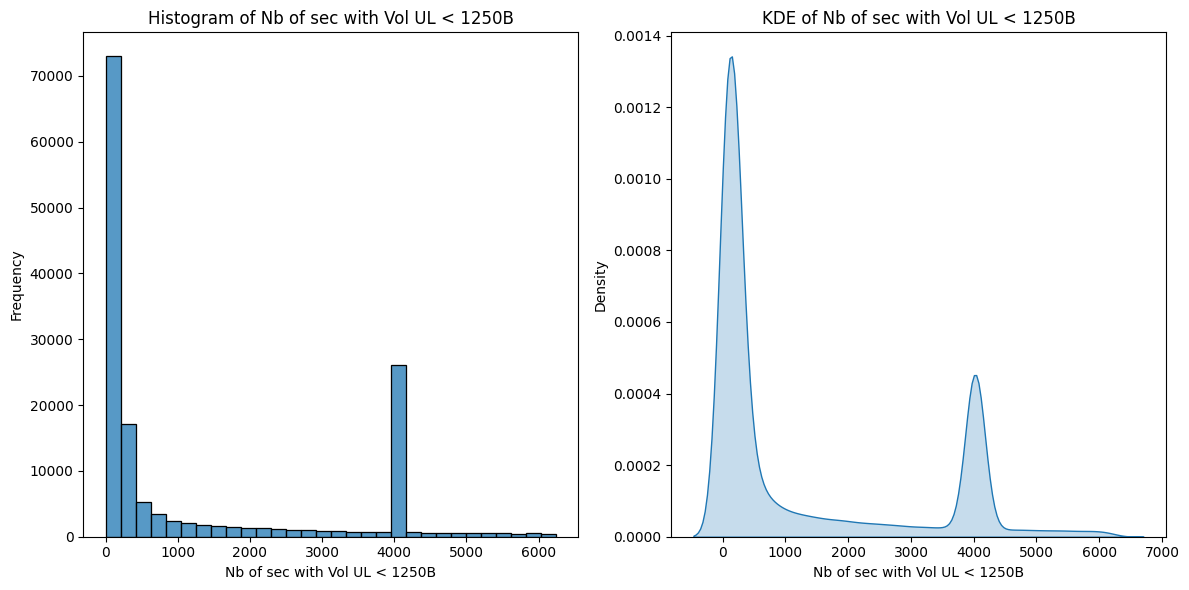

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


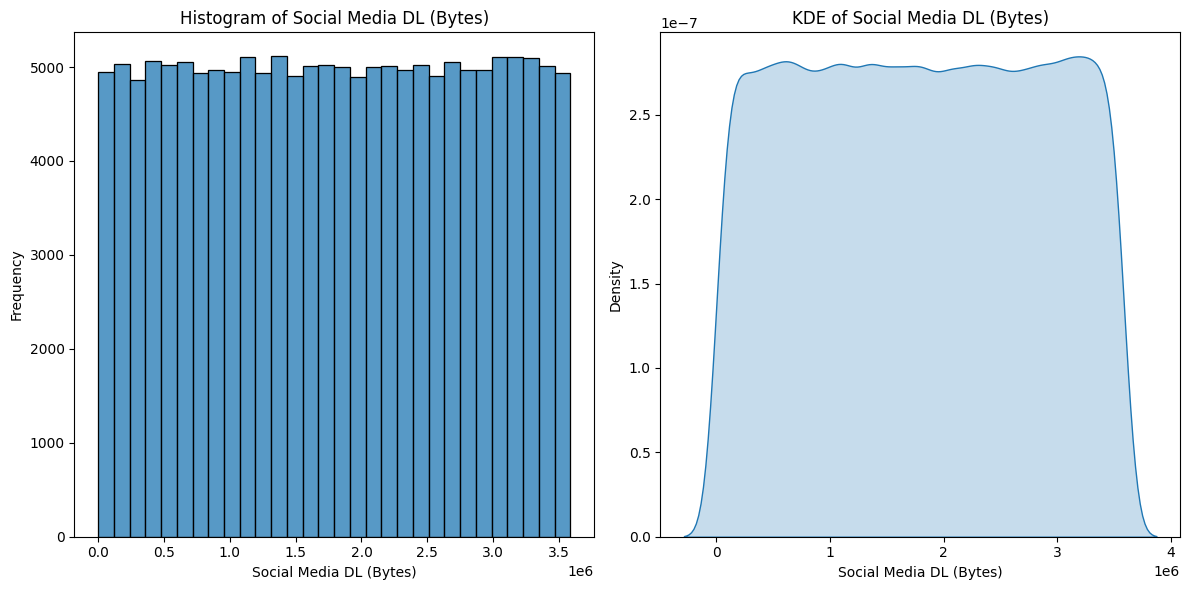

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


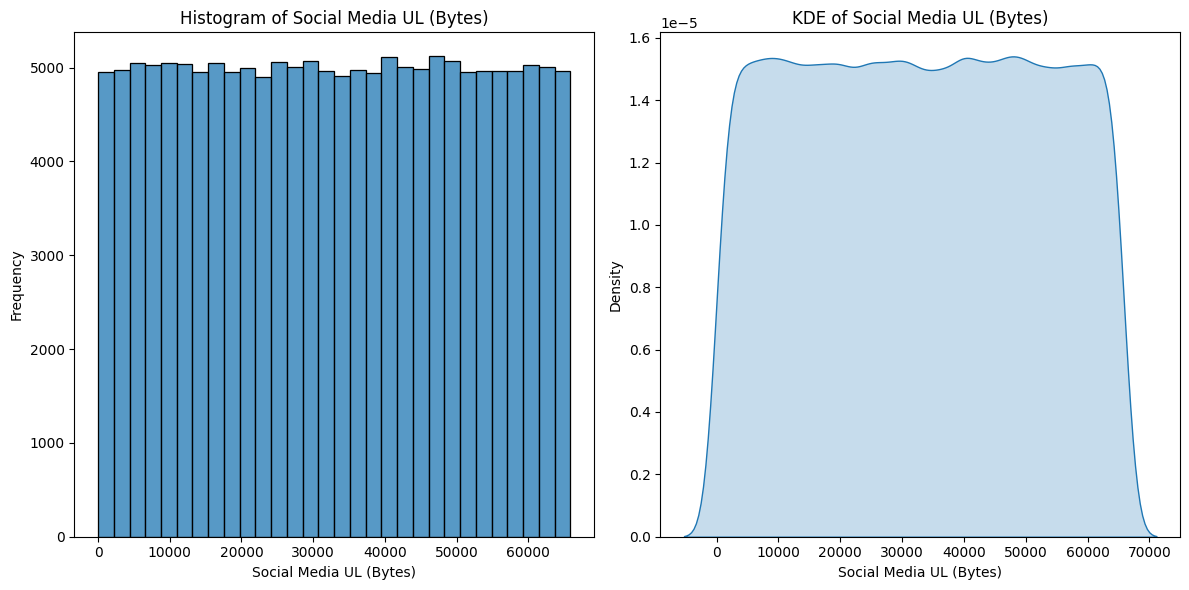

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


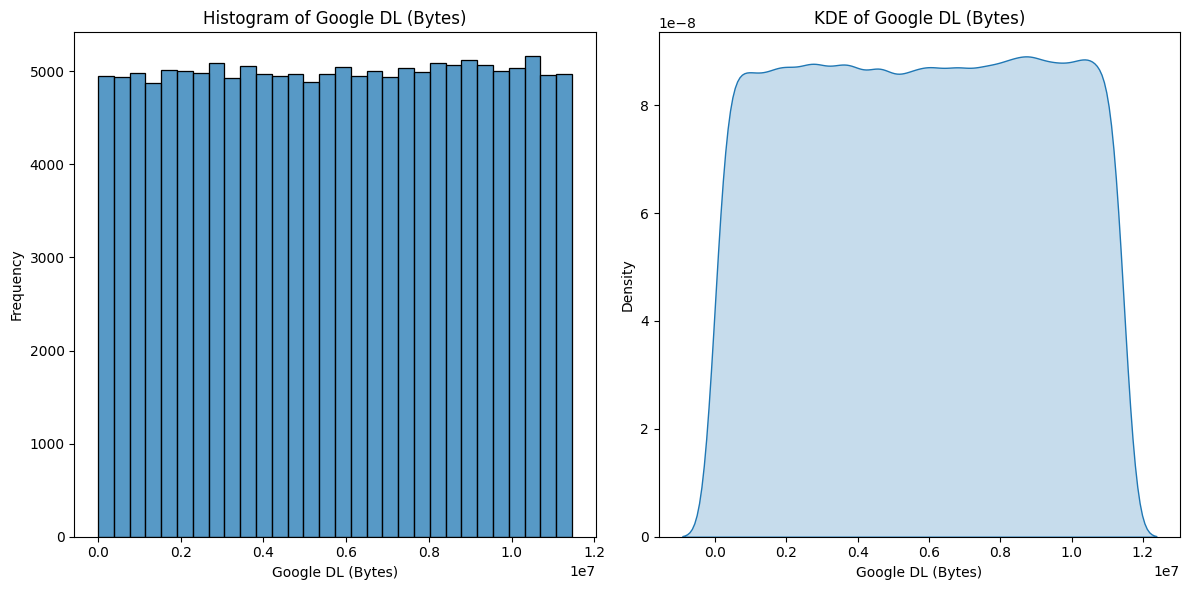

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


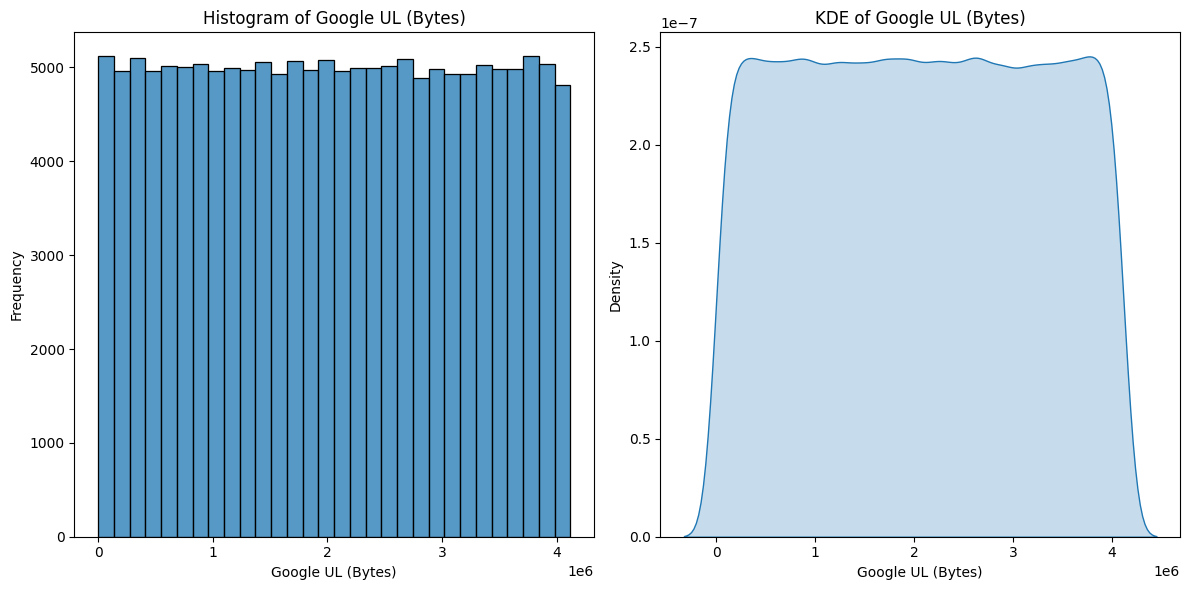

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


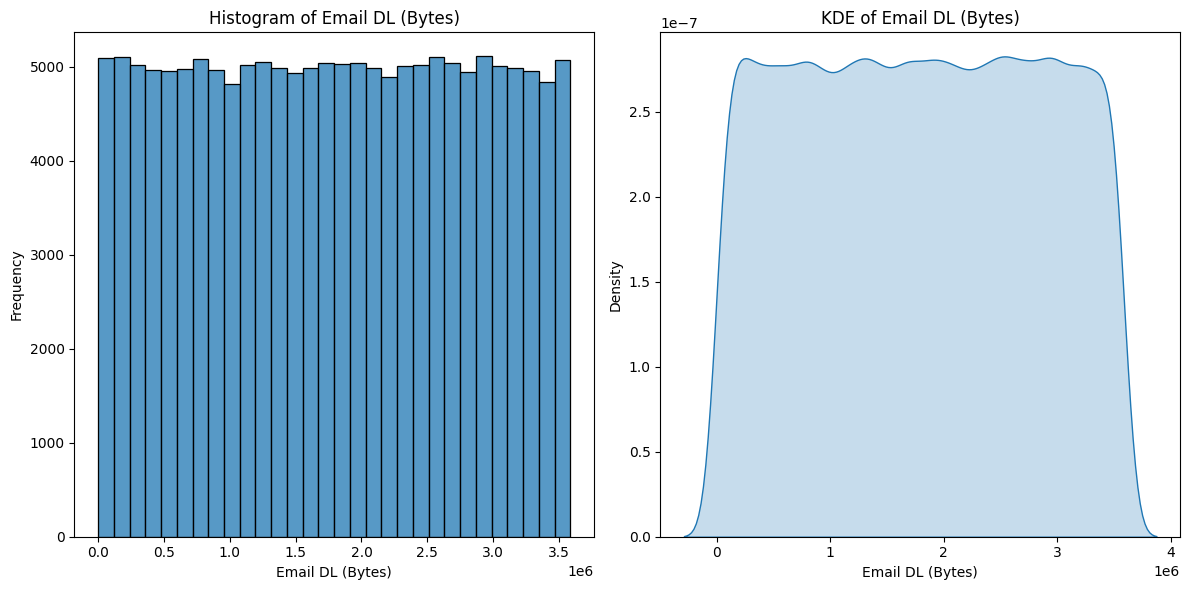

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


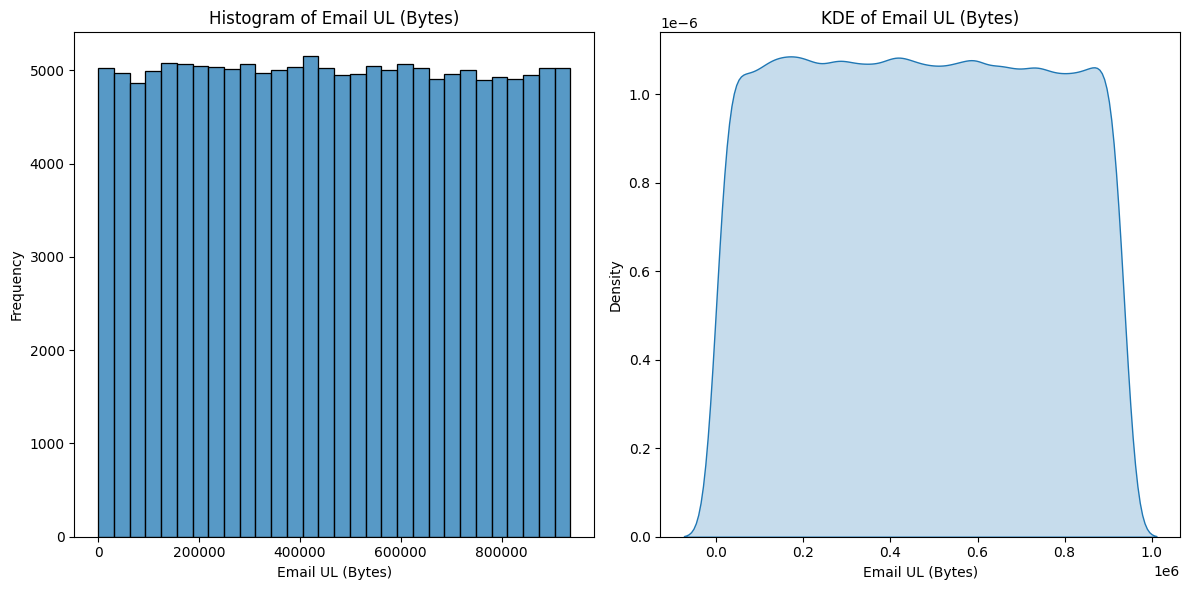

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


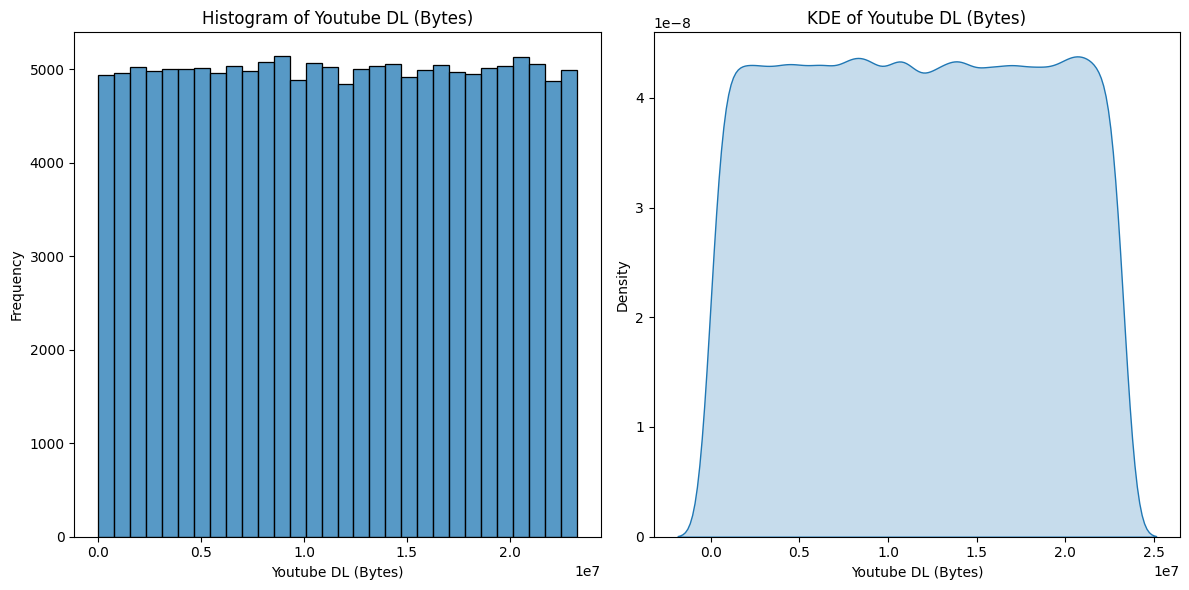

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


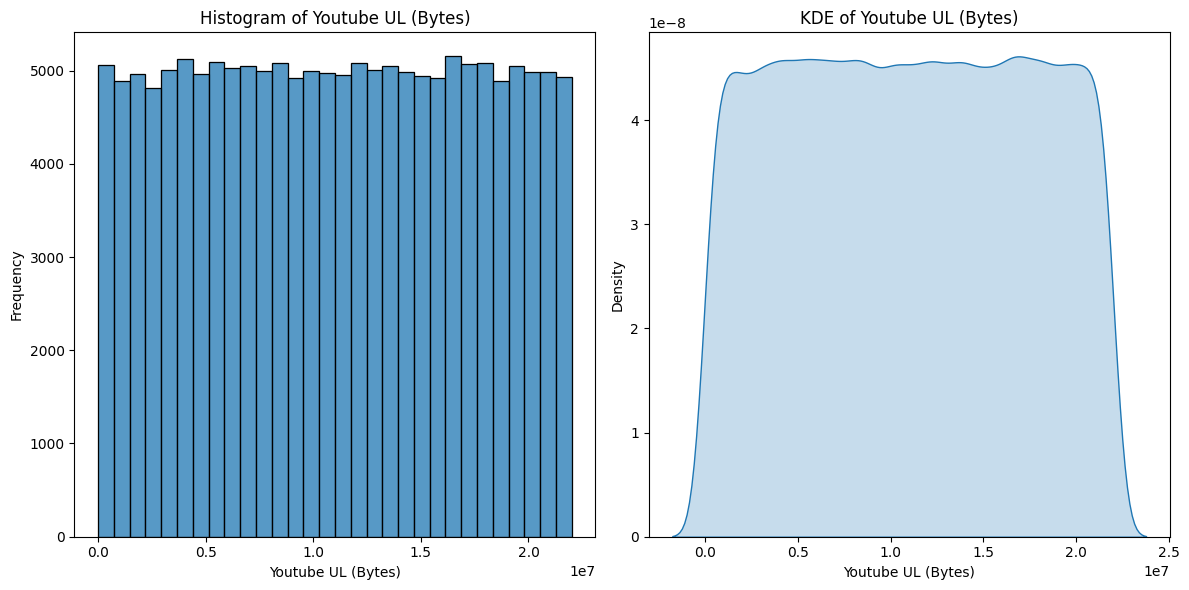

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


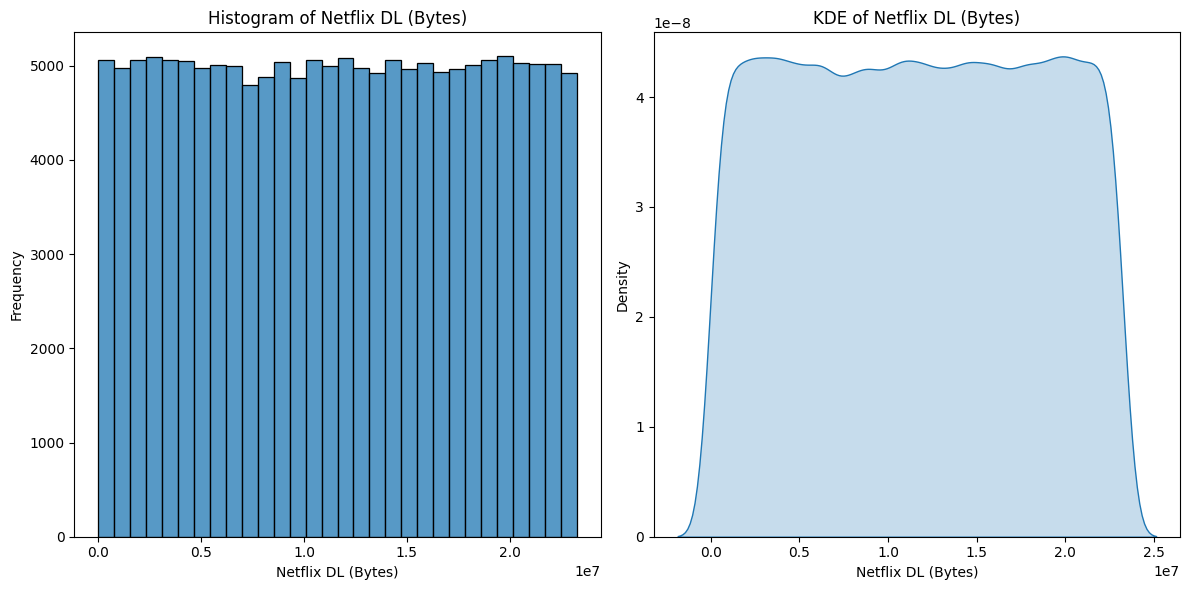

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


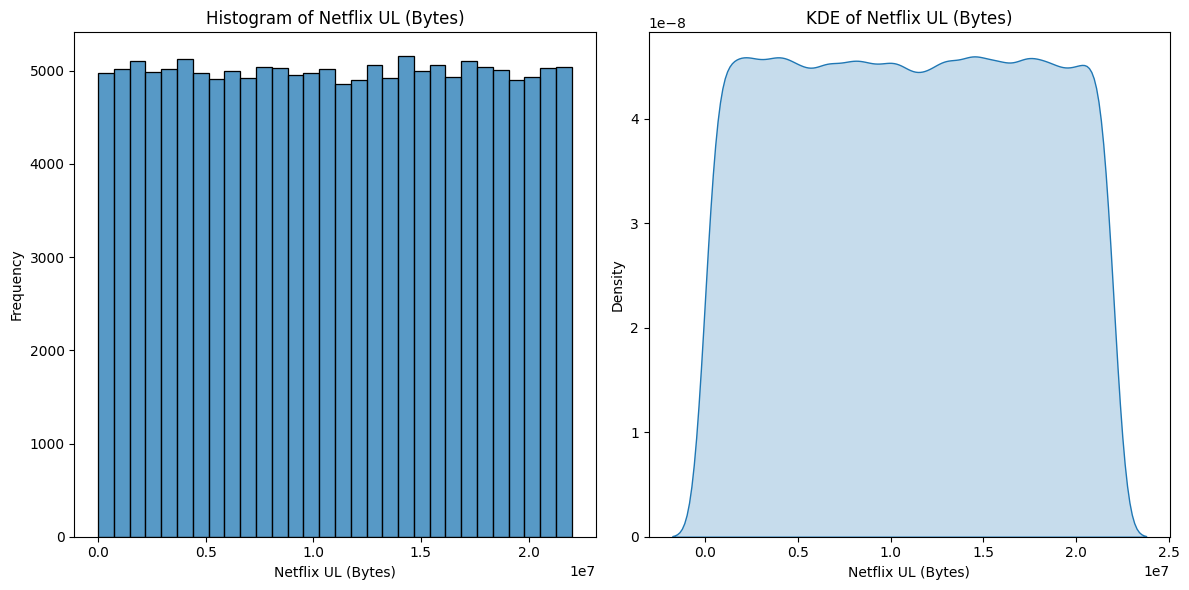

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


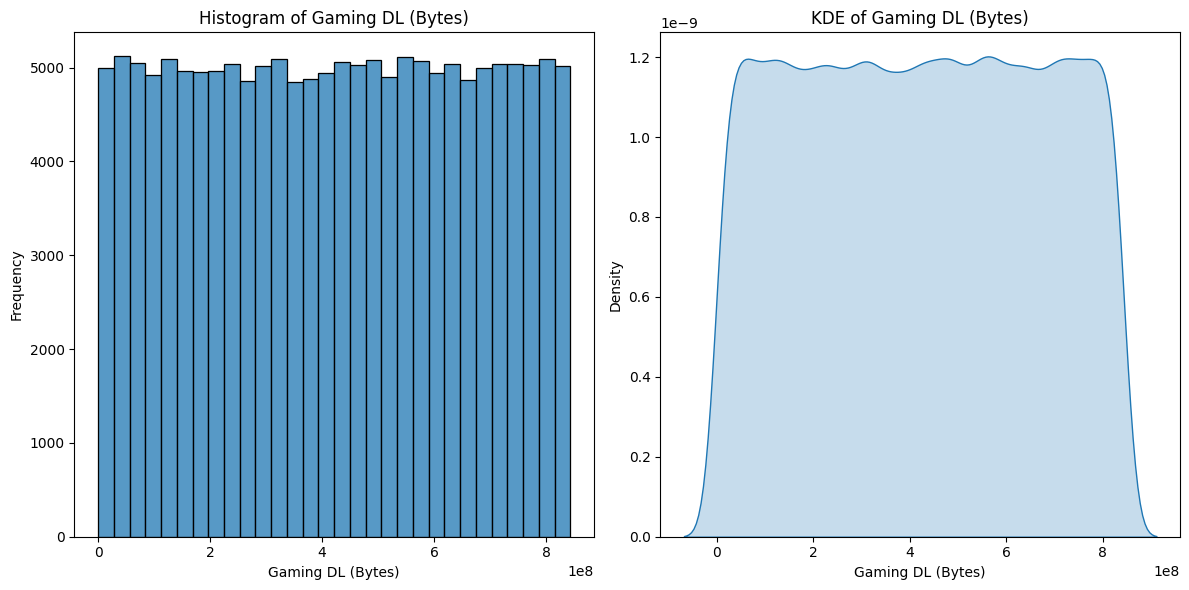

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


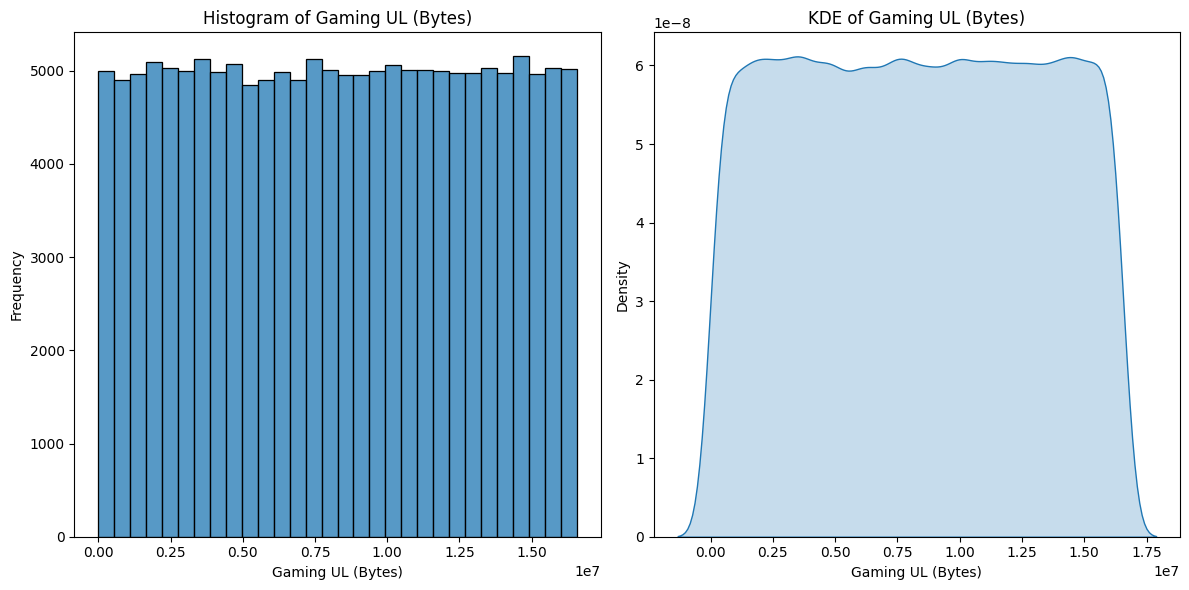

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


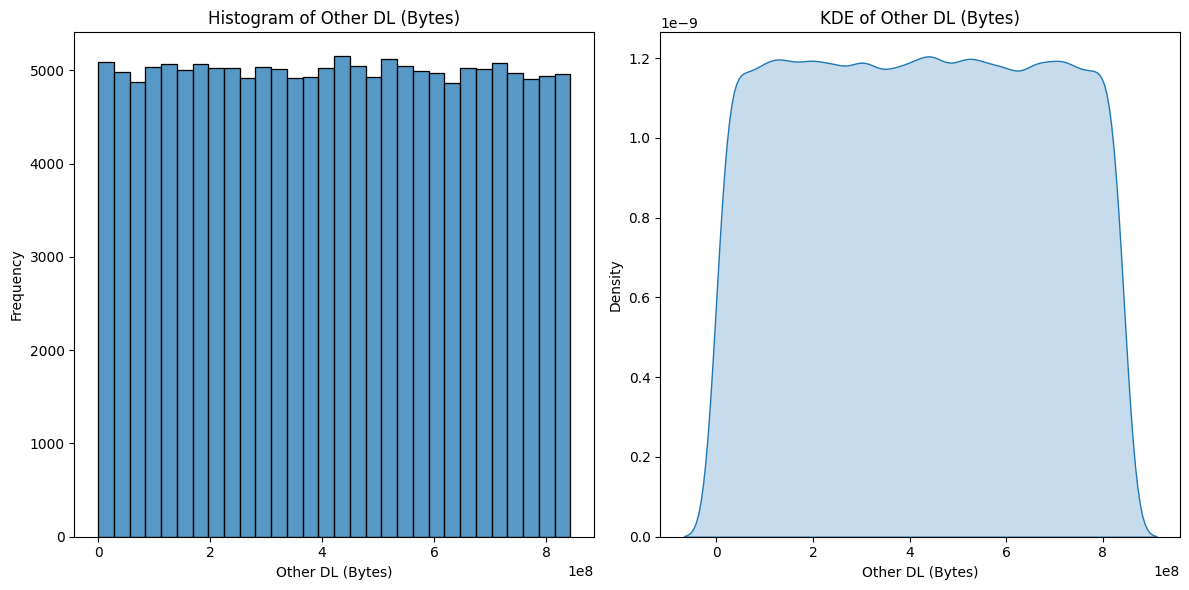

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


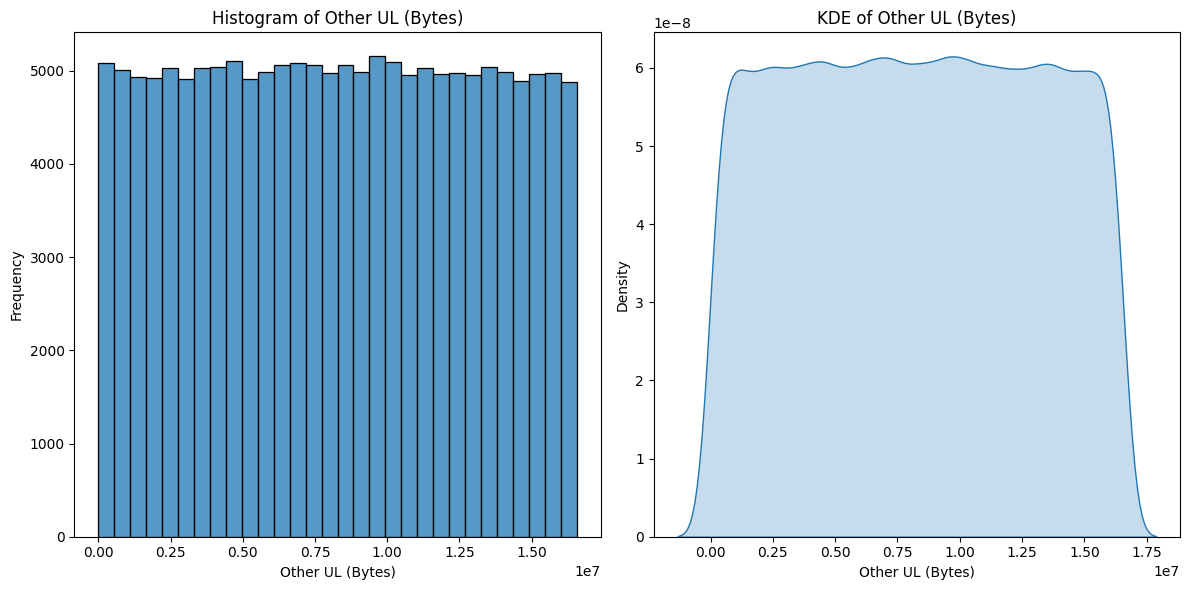

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


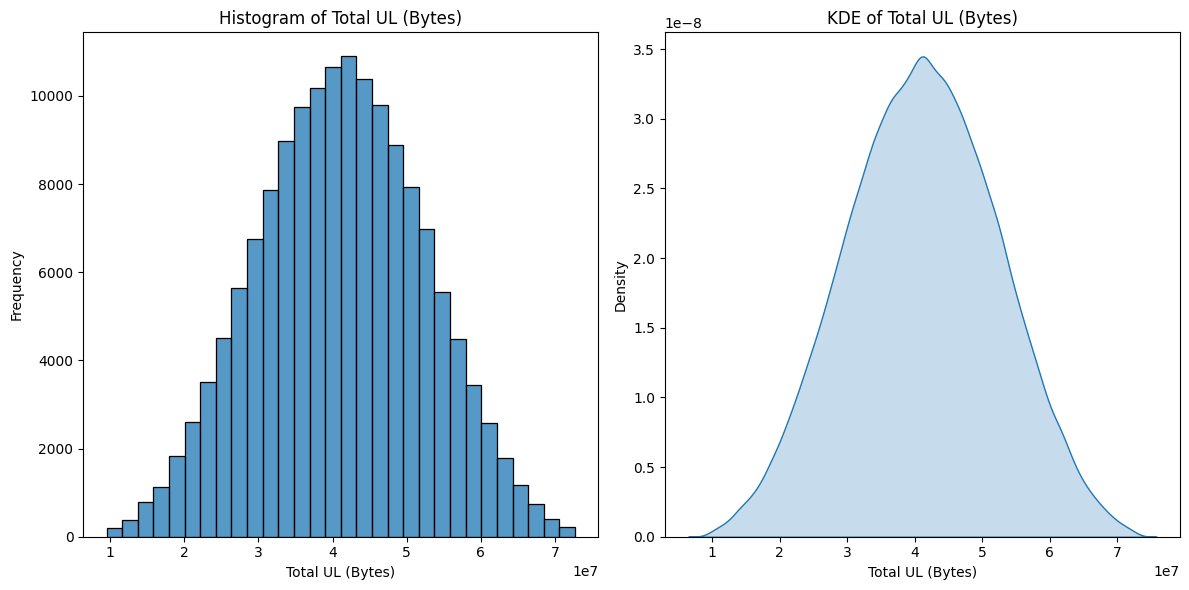

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


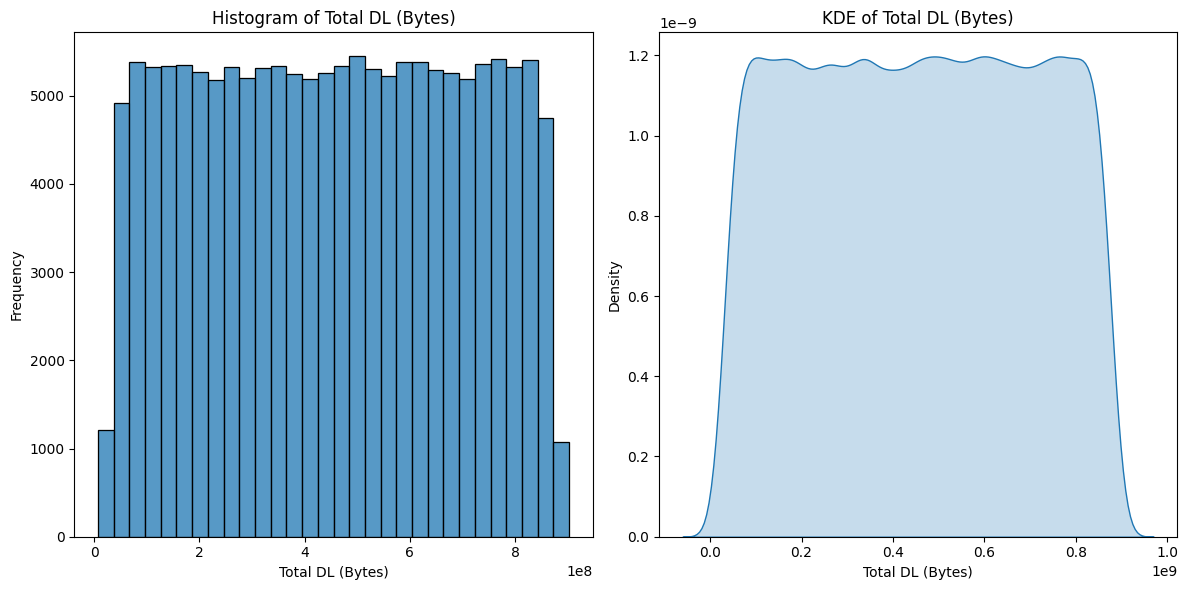

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


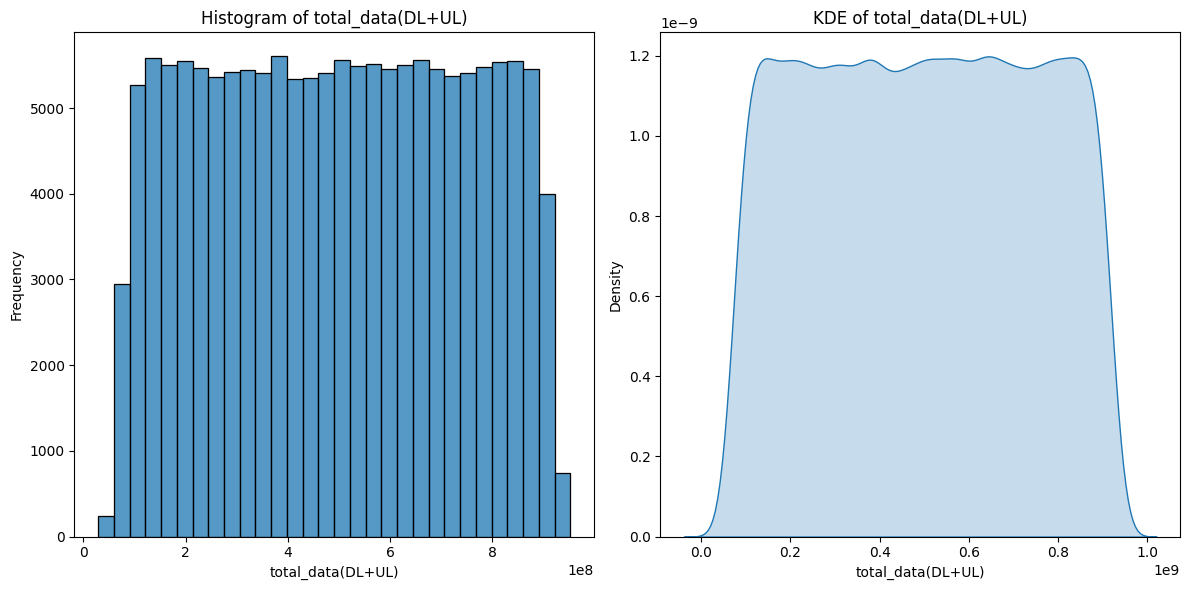

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\604395237.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[col], shade=True)


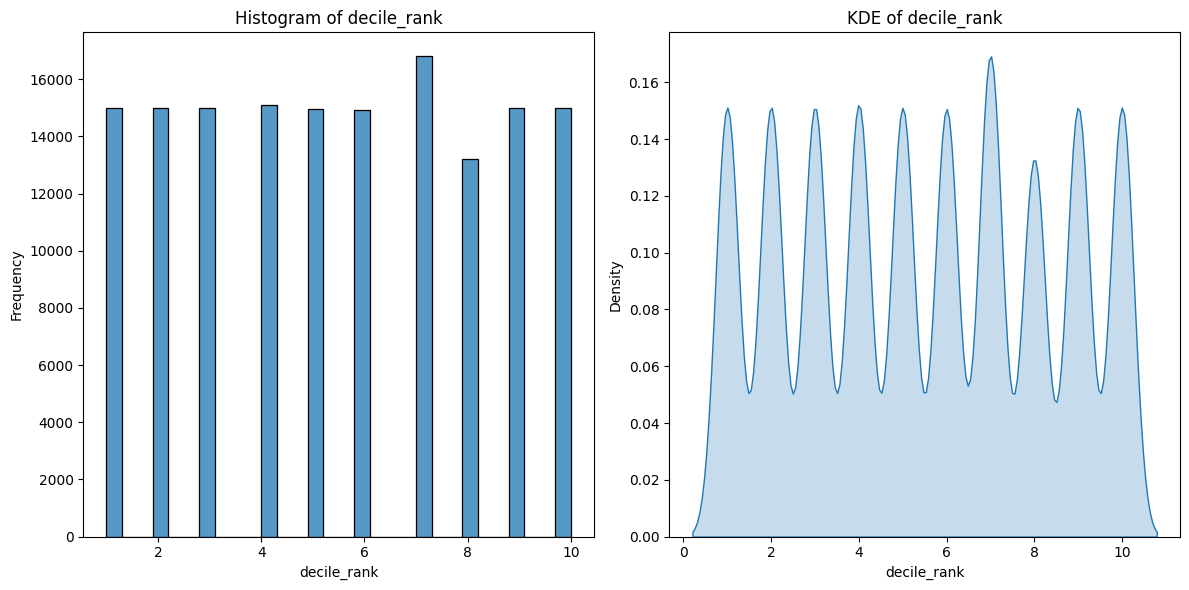

In [53]:
# Plotting histograms and KDE for each quantitative variable
for col in quantitative_df.columns:
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(quantitative_df[col], bins=30, kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE Plot (Density Plot)
    plt.subplot(1, 2, 2)
    sns.kdeplot(quantitative_df[col], shade=True)
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Interpretation of the Plots:
- Histograms:

Purpose: Show the frequency distribution of a numerical variable. The x-axis represents the value ranges, and the y-axis represents the frequency of data points within those ranges.
Interpretation: You can observe whether the data is normally distributed (bell curve), skewed to one side, or has any multimodal behavior (multiple peaks).

- KDE Plot (Density Plot):

Purpose: Shows the estimated probability density of the data. Unlike a histogram, it is a smooth curve.
Interpretation: Useful for seeing how the data is spread and detecting patterns or deviations from normal distribution. Peaks indicate where values are concentrated.

- Box Plots:

Purpose: Displays the distribution of the data, focusing on the interquartile range (IQR), median, and any potential outliers.
Interpretation: The box shows the middle 50% of data, while whiskers extend to the rest of the data. Any points outside the whiskers are outliers. This plot helps identify skewness, dispersion, and outliers in the data.

- Bar Plots (for Categorical Variables):

Purpose: Show the frequency distribution of categories. The y-axis (or x-axis if horizontal) shows the categories, and the x-axis (or y-axis if horizontal) shows their counts.
Interpretation: Useful for identifying the most and least common categories in the dataset. This can help in understanding the distribution of categorical data.


# Importance of Graphical Univariate Analysis:
- Histograms and KDE plots give a clear picture of the distribution of numerical variables, showing you where most of the data points lie, any outliers, and the shape of the data distribution.
- Box plots help identify outliers and provide an overview of the data spread, showing key summary statistics like median and quartiles.
- Bar plots allow for easy identification of the most common and least common categories, which can be useful when analyzing customer demographics, product categories, etc.
These graphical methods give quick insights into the underlying structure and patterns of your dataset.

# Bivariate Analysis 
- explore the relationship between each application & the total DL+UL data


In [54]:
df['Social Media data'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google data'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email data'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube data'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix data'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming data'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other data'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [55]:
df['total_data(DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']


C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\3179131333.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=app, y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


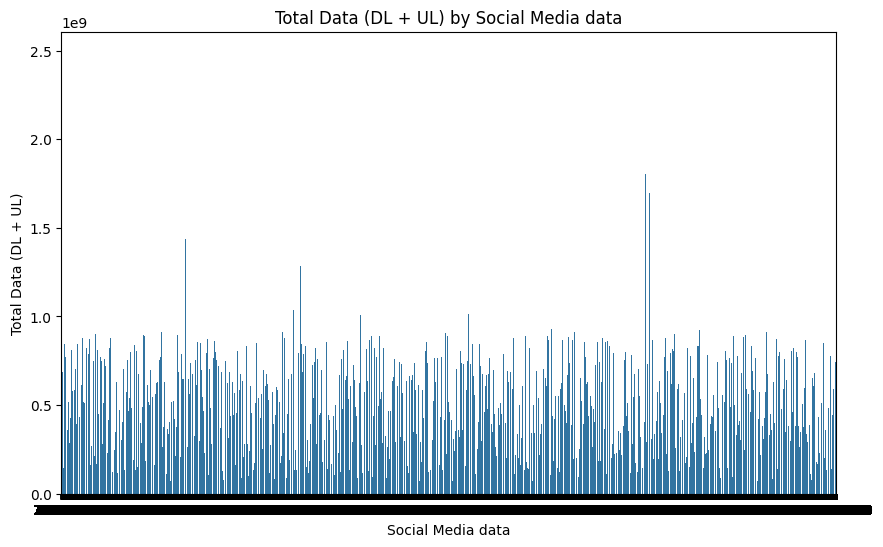

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\3179131333.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=app, y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


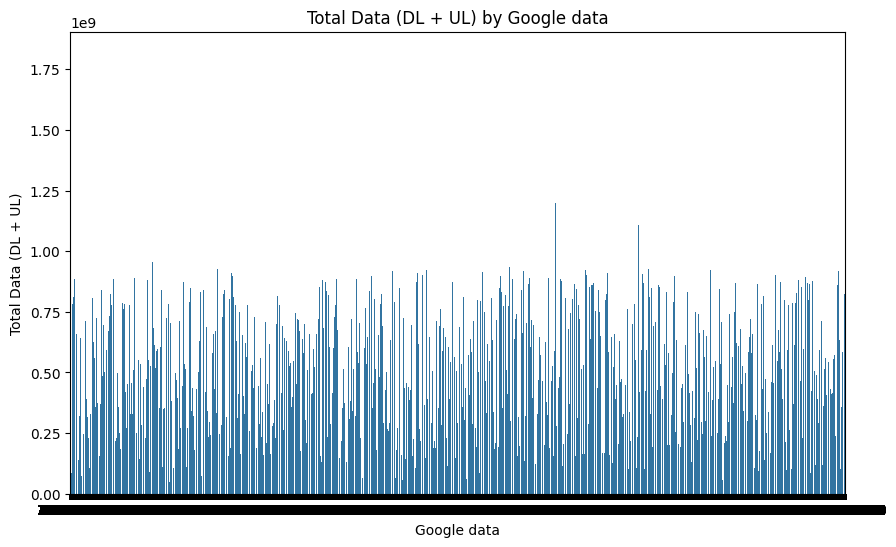

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\3179131333.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=app, y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


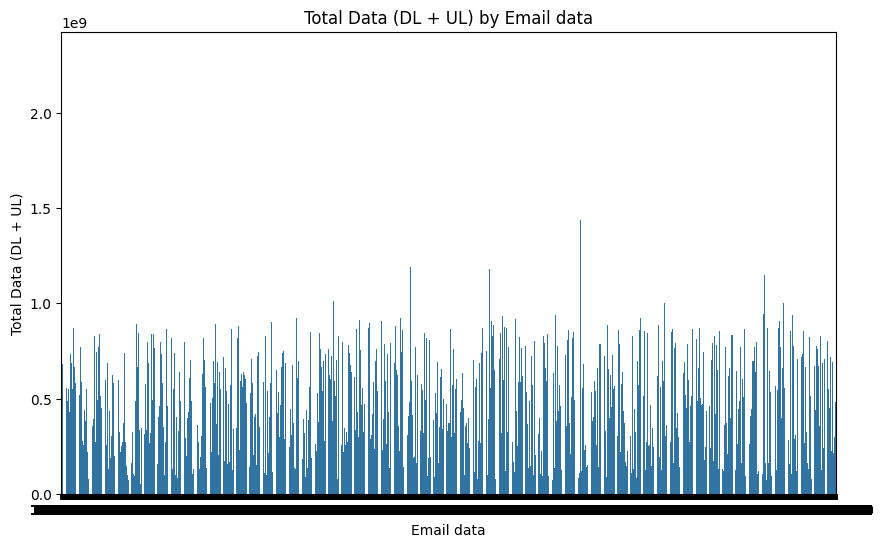

C:\Users\Hello\AppData\Local\Temp\ipykernel_21264\3179131333.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=app, y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


In [56]:
# List of the application variables 
applications = ['Social Media data', 'Google data', 'Email data', 'Youtube data', 'Netflix data', 'Gaming data', 'Other data']

# Bar Plot (Aggregated total data per application)
for app in applications:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=app, y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
    plt.title(f'Total Data (DL + UL) by {app}')
    plt.xlabel(app)
    plt.ylabel('Total Data (DL + UL)')
    plt.show()

# The above method takes time to run the code so that I make the applications code run individualy 

C:\Users\Hello\AppData\Local\Temp\ipykernel_884\1898625995.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Social Media data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


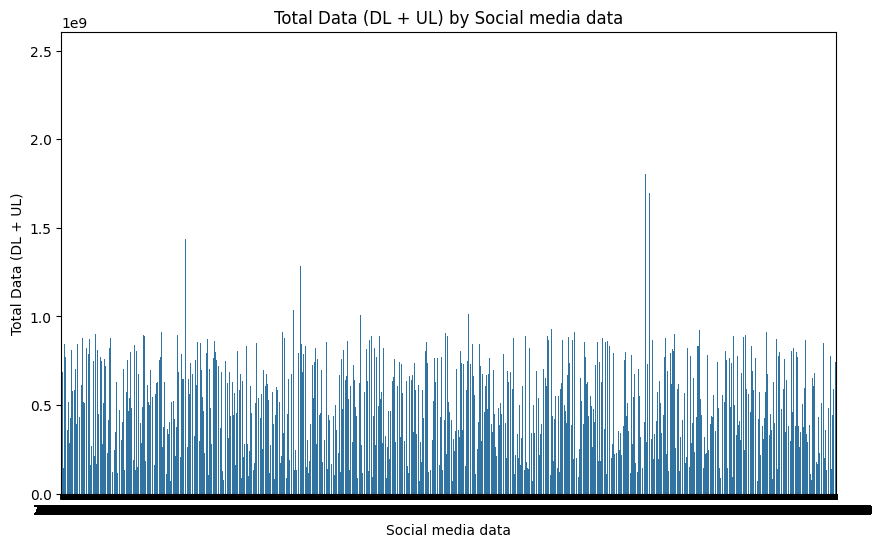

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Social Media data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Social media data')
plt.xlabel('Social media data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_884\3750787176.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Google data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


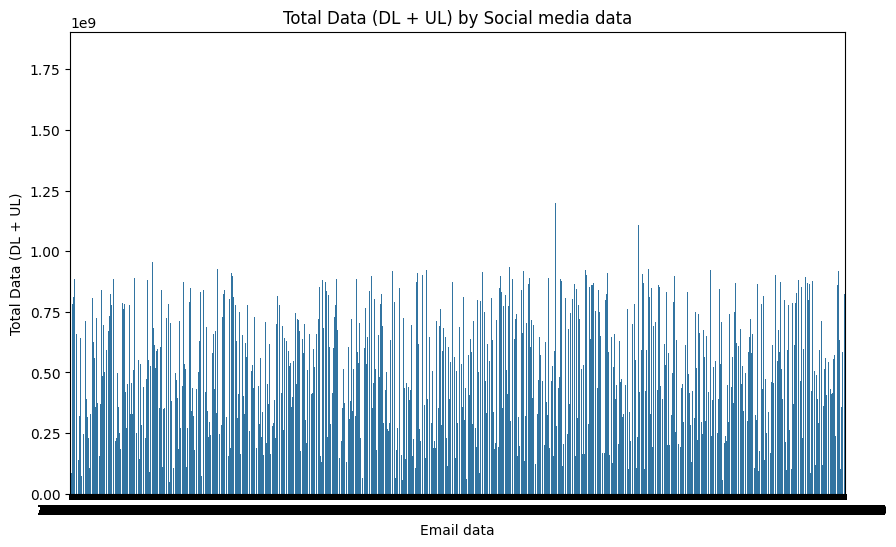

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Google data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Social media data')
plt.xlabel('Google Data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

In [2]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Email data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Email data')
plt.xlabel('Email data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['YouTube data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by YouTube data')
plt.xlabel('YouTube data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Netflix data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Netflix data')
plt.xlabel('Netflix data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Gaming data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Gaming data')
plt.xlabel('Gaming Data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_884\12915345.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Gaming data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)


KeyboardInterrupt: 

: 

: 

In [1]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Other data'], y='total_data(DL+UL)', data=df, estimator=sum, ci=None)
plt.title(f'Total Data (DL + UL) by Other data')
plt.xlabel('Other Data')
plt.ylabel('Total Data (DL + UL)')
plt.show()

NameError: name 'plt' is not defined

# Correlation Analysis

- compute a correlation matrix for: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 

In [ ]:
# Replace the column names with actual names if they differ in your dataset
columns = ['Social Media data', 'Google data', 'Email data', 'YouTube data', 'Netflix data', 'Gaming data', 'Other data']

# Compute the correlation matrix
correlation_matrix = df[columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

In [ ]:
# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Data Usage by Application')
plt.show()

# Dimensionality Reduction 
- perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results

In [ ]:
# Perform PCA
features = df.select_dtypes(include=[np.number])

# Fill NaNs with the mean of each column
features_filled = features.fillna(features.mean())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print("\nPCA Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("\nPCA Components:\n", pca.components_)

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title('PCA Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()